## Introduction
In this notebook, we have mainly focused on analyzing application_data.csv i.e. data about current application of loan.

## Approach of Application Data Analysis

- Importing Module
- Reading the Dataset into Pandas Dataframe.
- We have divided the features into small segments and analyzed segment-wise using a smaller dataframe containing only relevant categories.
- Data Cleaning, Missing Data Handling, Type casting are done segment-wise.
- Plots and percentage wise Dafaulter calculation are done segment-wise as well.

### Importing the libraries

In [ ]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import the useful libraries.
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

## Reading the datasets

In [ ]:
app_df=pd.read_csv("application_data.csv")
prev_app_df=pd.read_csv("previous_application.csv")

In [ ]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
prev_app_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

### Information of variables in data sets to get their data types.

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
app_df.shape

(307511, 122)

In [ ]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
app_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
app_df.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

In [ ]:
len(app_df)

307511

In [ ]:
x = len(app_df)/2
x

153755.5

In [ ]:
app_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
app_df.isnull().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [ ]:
len(app_df.columns[app_df.isnull().sum() < 153755])

81

In [ ]:
app_df_null= app_df.isnull().sum().sort_values(ascending = False)

In [ ]:
App_null = app_df_null*100/len(app_df)

App_null=round((App_null.sort_values(ascending=False)),2).sort_values(ascending=False).head(60)

In [ ]:
columns_null_40=list(App_null[App_null>40].index)

In [ ]:
app_df.drop(columns=columns_null_40, inplace=True)
app_df.shape

(307511, 73)

In [ ]:
# Categorical Columns
categorical_data=app_df.select_dtypes(include="object")
categorical_data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
# Numerical Columns
Numerical_data=app_df.select_dtypes(include=["int64","float64"])
Numerical_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [ ]:
len(Numerical_data.columns)

61

In [ ]:
nulls=app_df.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [ ]:
app_df.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 73, dtype: int64

In [ ]:
missing_df=app_df.count()/len(app_df)
missing_df

SK_ID_CURR                    1.000000
TARGET                        1.000000
NAME_CONTRACT_TYPE            1.000000
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.864984
AMT_REQ_CREDIT_BUREAU_WEEK    0.864984
AMT_REQ_CREDIT_BUREAU_MON     0.864984
AMT_REQ_CREDIT_BUREAU_QRT     0.864984
AMT_REQ_CREDIT_BUREAU_YEAR    0.864984
Length: 73, dtype: float64

In [ ]:
missing_df=(1-missing_df)*100
missing_df

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [ ]:
missing_df.sort_values(ascending=False).head(60)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [ ]:
missing_df.info()

<class 'pandas.core.series.Series'>
Index: 73 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
Series name: None
Non-Null Count  Dtype  
--------------  -----  
73 non-null     float64
dtypes: float64(1)
memory usage: 3.2+ KB


### Imputation Of Missing Values:

In [ ]:
app_df["EXT_SOURCE_3"].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

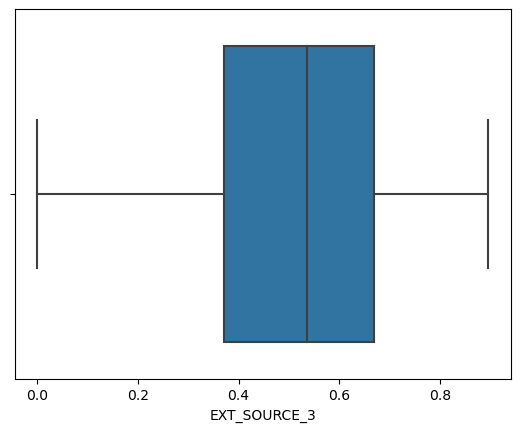

In [ ]:
sns.boxplot(app_df["EXT_SOURCE_3"]);

- **As per the plot there is no outlier for this column.**

In [ ]:
app_df["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

- **Mean = 0.510 and median = 0.535 which is not that much difference. If we will see the 25% and 75%, that also differed equally. We can impute the mean value of this column and also its a floating point column data type.**

In [ ]:
EXT_SOURCE_3_mean = app_df["EXT_SOURCE_3"].mean()
EXT_SOURCE_3_mean

0.5108529061800121

In [ ]:
app_df["EXT_SOURCE_3"] = app_df["EXT_SOURCE_3"].fillna(EXT_SOURCE_3_mean)

In [ ]:
app_df["EXT_SOURCE_3"].isnull().sum()

0

**We have found out the mean value of the column and then we have filled all null values with the mean value.**

**In a similar way we can fill other columns null values with respect to their mean or median.**

**Let's take column EXT_SOURCE_2 which is having 0.214626% of missing value.**

In [ ]:
app_df["EXT_SOURCE_2"].isnull().mean()

0.0021462646864665006

In [ ]:
app_df["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

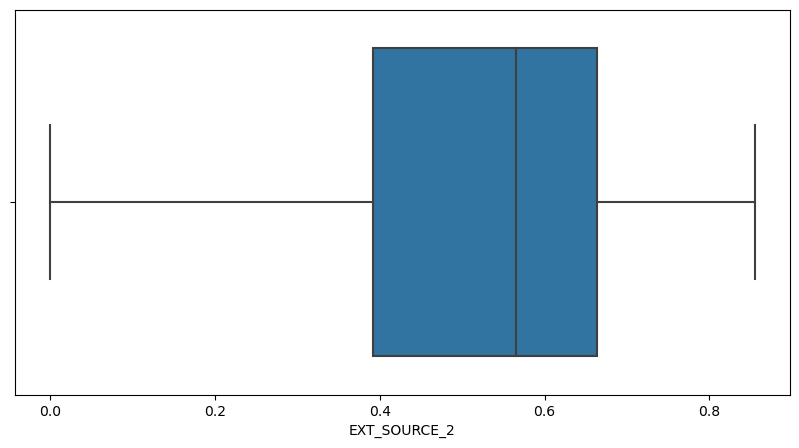

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(app_df["EXT_SOURCE_2"])
plt.show()

In [ ]:
EXT_SOURCE_2_mean=app_df["EXT_SOURCE_2"].mean()
EXT_SOURCE_2_mean

0.5143926741308463

In [ ]:
app_df["EXT_SOURCE_2"]=app_df["EXT_SOURCE_2"].fillna(EXT_SOURCE_2_mean)

In [ ]:
app_df["EXT_SOURCE_2"].isnull().sum()

0

#### Checking column "OCCUPATION_TYPE"

In [ ]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [ ]:
app_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
app_df.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [ ]:
app_df.OCCUPATION_TYPE.isnull().sum()

96391

**We can see that the mode of this column is coming as "Laborers" but you can see there that the null values are more than the "Laborers" count. So, let's keep the null value as it is.**

In [ ]:
app_df.AMT_GOODS_PRICE.isnull().mean()*100

0.09040327012692229

In [ ]:
app_df["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
app_df["AMT_GOODS_PRICE"].describe().apply(lambda p:"%.2f" %p)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

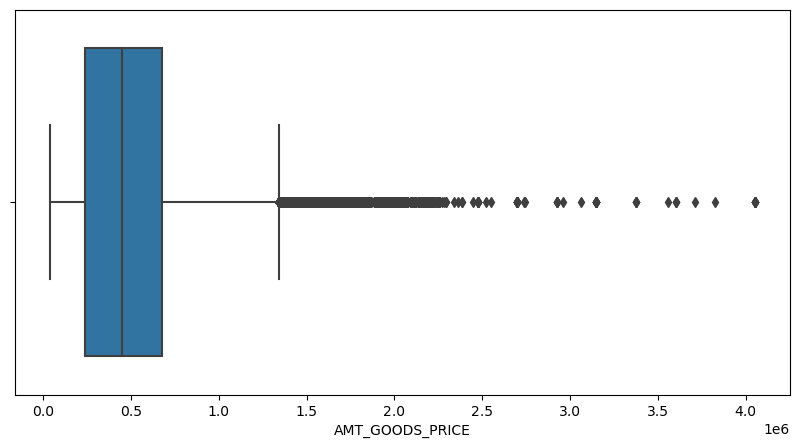

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(app_df.AMT_GOODS_PRICE);

In [ ]:
# Let's drop these outliers since they are very low in amount.
app_df=app_df[~np.isnan(app_df["AMT_GOODS_PRICE"])]

In [ ]:
# checking AMT_REQ_CREDIT_BUREAU_QRT for missing values
app_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().mean()*100

13.498875446322497

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265760.000000
mean          0.265525
std           0.794239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

- **Since 0.0 is repeated mostly, we can replace the missing values with the mode."

In [ ]:
mode_AMT_REQ_CREDIT_BUREAU_QRT=app_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
mode_AMT_REQ_CREDIT_BUREAU_QRT

0.0

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT=app_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(mode_AMT_REQ_CREDIT_BUREAU_QRT)

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [ ]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.498875
AMT_REQ_CREDIT_BUREAU_WEEK    13.498875
AMT_REQ_CREDIT_BUREAU_MON     13.498875
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    13.498875
Length: 73, dtype: float64

In [ ]:
#checking AMT_REQ_CREDIT_BUREAU_HOUR for missing values
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264135
1.0      1559
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [ ]:
mode_AMT_REQ_CREDIT_BUREAU_HOUR=app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]

In [ ]:
#Replacing with the mode for the missing values
app_df.AMT_REQ_CREDIT_BUREAU_HOUR=app_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(mode_AMT_REQ_CREDIT_BUREAU_HOUR)

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [ ]:
# checking AMT_REQ_CREDIT_BUREAU_DAY for missing values
app_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41473

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264271
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [ ]:
mode_AMT_REQ_CREDIT_BUREAU_DAY=app_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY=app_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(mode_AMT_REQ_CREDIT_BUREAU_DAY)

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [ ]:
#checking AMT_REQ_CREDIT_BUREAU_WEEK for missing values
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41473

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257228
1.0      8204
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [ ]:
mode_AMT_REQ_CREDIT_BUREAU_WEEK=app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK=app_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(mode_AMT_REQ_CREDIT_BUREAU_WEEK)

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [ ]:
#checking AMT_REQ_CREDIT_BUREAU_YEAR for missing values
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41473

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71733
1.0     63338
2.0     50143
3.0     33606
4.0     20702
5.0     12048
6.0      6961
7.0      3866
8.0      2126
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [ ]:
mode_AMT_REQ_CREDIT_BUREAU_YEAR=app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR=app_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(mode_AMT_REQ_CREDIT_BUREAU_YEAR)

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [ ]:
#checking AMT_REQ_CREDIT_BUREAU_MON for missing values
app_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41473

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222022
1.0      33128
2.0       5385
3.0       1991
4.0       1076
5.0        602
6.0        342
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [ ]:
mode_AMT_REQ_CREDIT_BUREAU_MON=app_df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_MON=app_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(mode_AMT_REQ_CREDIT_BUREAU_MON)

In [ ]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [ ]:
(app_df.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.355356
OBS_30_CNT_SOCIAL_CIRCLE        0.332321
DEF_30_CNT_SOCIAL_CIRCLE        0.332321
OBS_60_CNT_SOCIAL_CIRCLE        0.332321
DEF_60_CNT_SOCIAL_CIRCLE        0.332321
                                 ...    
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

**Observation:**
- We have imputed all the missing values except the "OCCUPATION_TYPE", since the mode is "Labour" whose count is less than the missing values.

### Handling Errors in Columns:

In [ ]:
Days_col=app_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']]
Days_col.head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH
0       -9461           -637            -2120
1      -16765          -1188             -291
2      -19046           -225            -2531
3      -19005          -3039            -2437
4      -19932          -3038            -3458

- **Since Days values can't be negative, we have to convert them to absolute values.**

In [ ]:
app_df.DAYS_BIRTH =app_df.DAYS_BIRTH.abs()
app_df.DAYS_BIRTH

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307233, dtype: int64

In [ ]:
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.abs()
app_df.DAYS_EMPLOYED

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307233, dtype: int64

In [ ]:
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.abs()
app_df.DAYS_ID_PUBLISH

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307233, dtype: int64

In [ ]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 73 columns]

### Handling Outliers

- 'AMT_INCOME_TOTAL'
- 'AMT_CREDIT'
- 'AMT_ANNUITY'
- 'AMT_GOODS_PRICE'
- 'AGE'

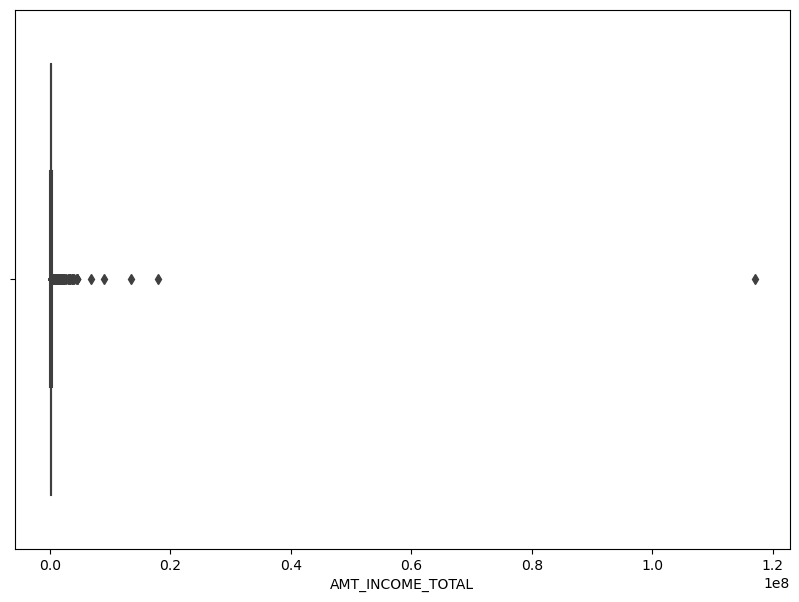

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(app_df.AMT_INCOME_TOTAL);

In [ ]:
q1=app_df["AMT_INCOME_TOTAL"].describe()["25%"]
q3=app_df["AMT_INCOME_TOTAL"].describe()["75%"]
iqr=q3-q1
upp_bound=q3+1.5*iqr
app_df["AMT_INCOME_TOTAL"]=np.where(app_df["AMT_INCOME_TOTAL"]>upp_bound,upp_bound,app_df["AMT_INCOME_TOTAL"])

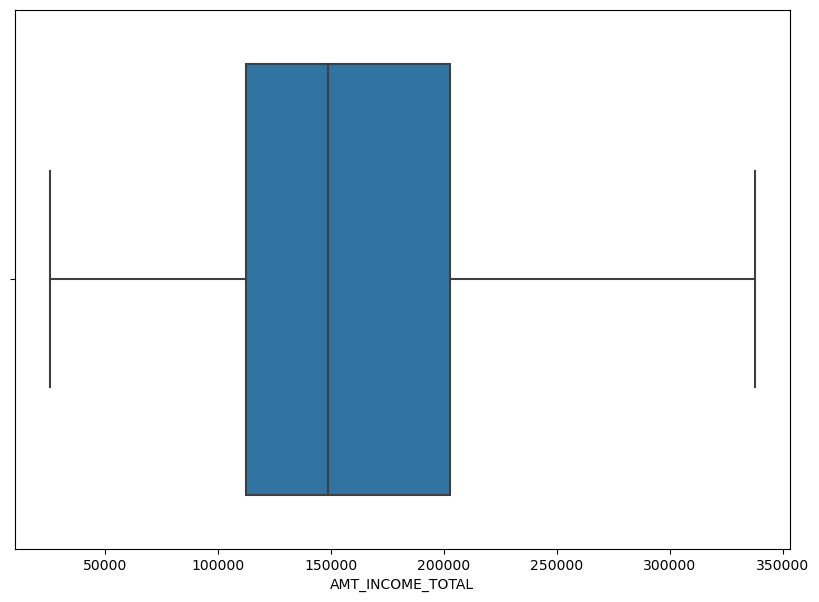

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(app_df.AMT_INCOME_TOTAL);

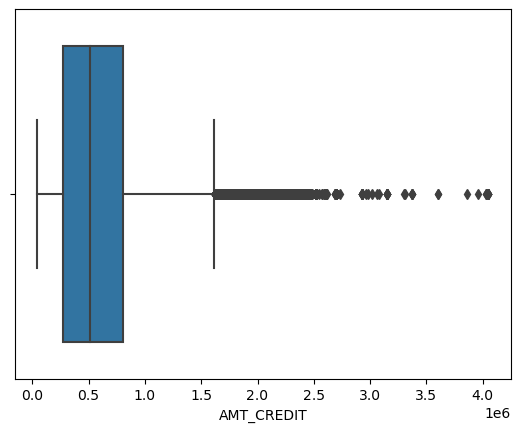

In [ ]:
# checking outliers for AMT_CREDIT

sns.boxplot(app_df.AMT_CREDIT);

In [ ]:
q1=app_df["AMT_CREDIT"].describe()["25%"]
q3=app_df["AMT_CREDIT"].describe()["75%"]
iqr=q3-q1
upp_bound=q3+1.5*iqr
app_df["AMT_CREDIT"]=np.where(app_df["AMT_CREDIT"]>upp_bound,upp_bound,app_df["AMT_CREDIT"])

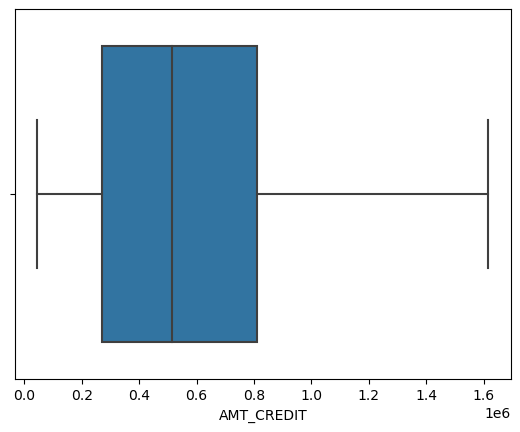

In [ ]:
sns.boxplot(app_df.AMT_CREDIT);

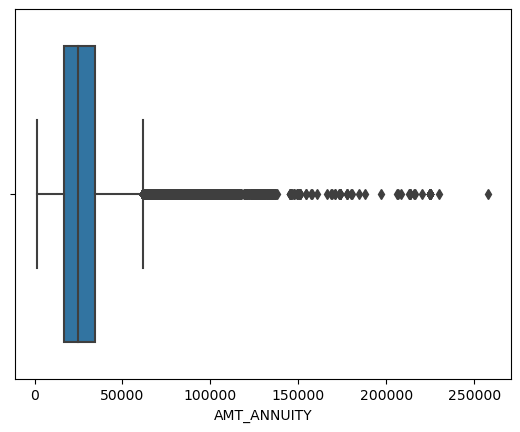

In [ ]:
# checking outliers for AMT_ANNUITY

sns.boxplot(app_df.AMT_ANNUITY);

**There is no outlier here. No need for adjustment for this column.**

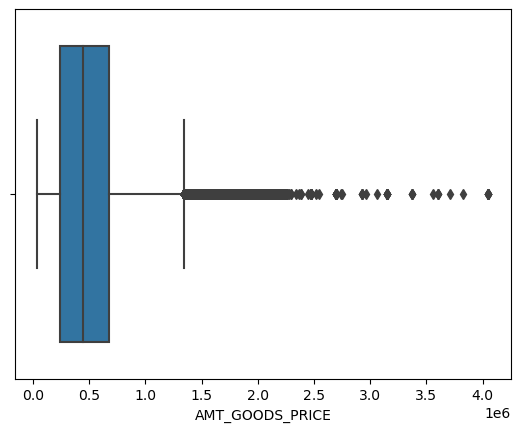

In [ ]:
# checking outliers for AMT_GOODS_PRICE

sns.boxplot(app_df.AMT_GOODS_PRICE);

In [ ]:
q1=app_df["AMT_GOODS_PRICE"].describe()["25%"]
q3=app_df["AMT_GOODS_PRICE"].describe()["75%"]
iqr=q3-q1
upp_bound=q3+1.5*iqr
app_df["AMT_GOODS_PRICE"]=np.where(app_df["AMT_GOODS_PRICE"]>upp_bound,upp_bound,app_df["AMT_GOODS_PRICE"])

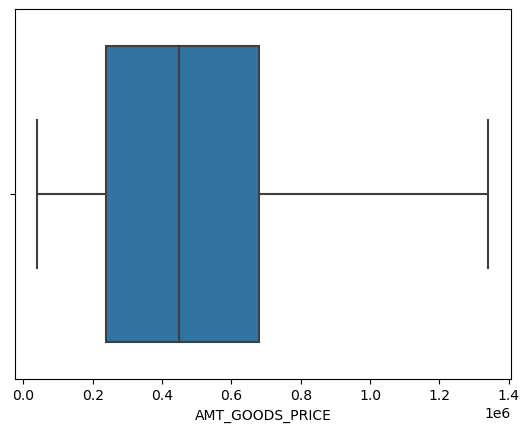

In [ ]:
sns.boxplot(app_df.AMT_GOODS_PRICE);

In [ ]:
app_df.CODE_GENDER.value_counts()

F      202259
M      104970
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
app_df.CODE_GENDER=app_df.CODE_GENDER.replace('XNA','F')

In [ ]:
app_df.CODE_GENDER.value_counts()

F    202263
M    104970
Name: CODE_GENDER, dtype: int64

### Data Imbalance Checking

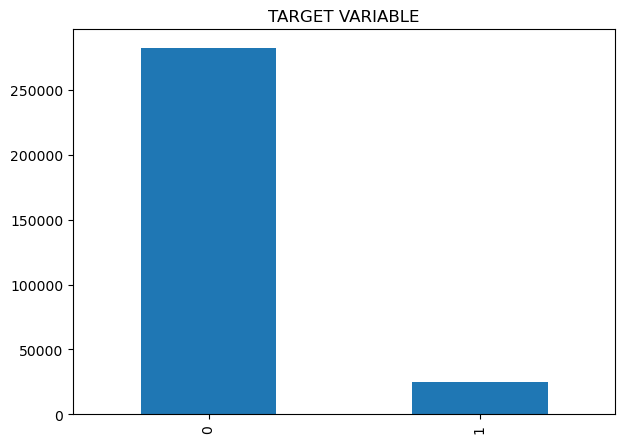

In [ ]:
# Target Variable
plt.figure(figsize=(7,5))
app_df.TARGET.value_counts().plot(kind="bar")
plt.title("TARGET VARIABLE");

In [ ]:
app_df.TARGET.value_counts(normalize=True)*100

0    91.926649
1     8.073351
Name: TARGET, dtype: float64

**As we know from the data dictionary, 1 mean defaulters and 0 mean not. Here, some defaulters are there. But the no of defaulter are very less compare to the non defaulters. Only 8.07% are Defaulters out of 100.**

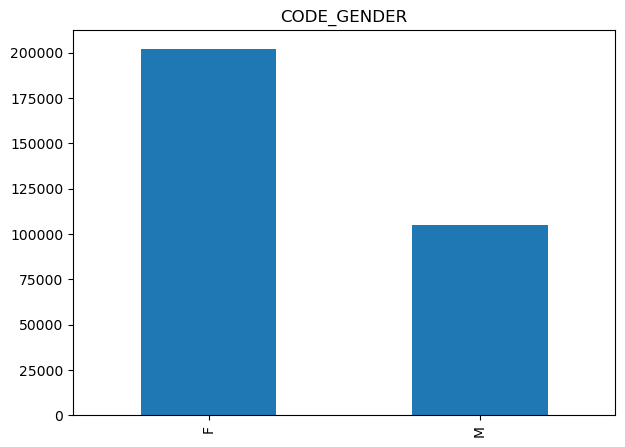

In [ ]:
#CODE_GENDER variable
plt.figure(figsize=(7,5))
app_df.CODE_GENDER.value_counts().plot(kind="bar")
plt.title('CODE_GENDER');

In [ ]:
app_df.CODE_GENDER.value_counts(normalize= True)*100

F    65.833748
M    34.166252
Name: CODE_GENDER, dtype: float64

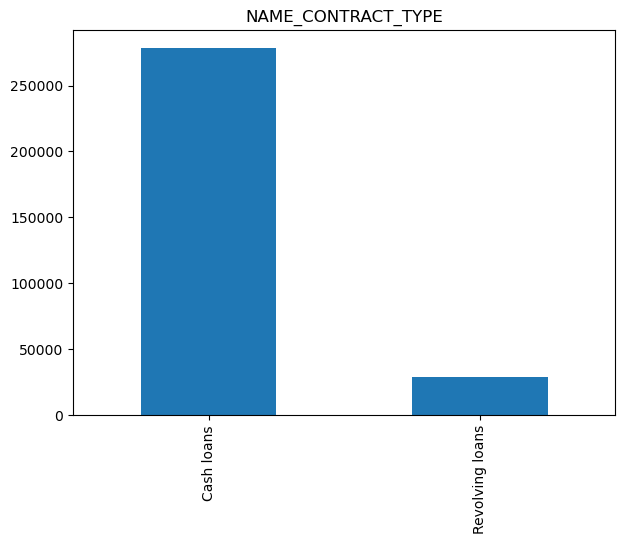

In [ ]:
# NAME_CONTRACT_TYPE
plt.figure(figsize=(7,5))
app_df.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")
plt.title('NAME_CONTRACT_TYPE');

In [ ]:
app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.560584
Revolving loans     9.439416
Name: NAME_CONTRACT_TYPE, dtype: float64

**There are more cash loans than the Revolving Loans.**

Working                 51.618478
Commercial associate    23.295024
Pensioner               18.012063
State servant            7.056534
Unemployed               0.007161
Student                  0.005859
Businessman              0.003255
Maternity leave          0.001627
Name: NAME_INCOME_TYPE, dtype: float64 

Secondary / secondary special    71.018087
Higher education                 24.345692
Incomplete higher                 3.341763
Lower secondary                   1.241078
Academic degree                   0.053380
Name: NAME_EDUCATION_TYPE, dtype: float64 

Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.231860
Name: NAME_FAMILY_STATUS, dtype: float64 

Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.231860
Name: NAME_FAMILY_STATUS, dtype: float64 

Ho

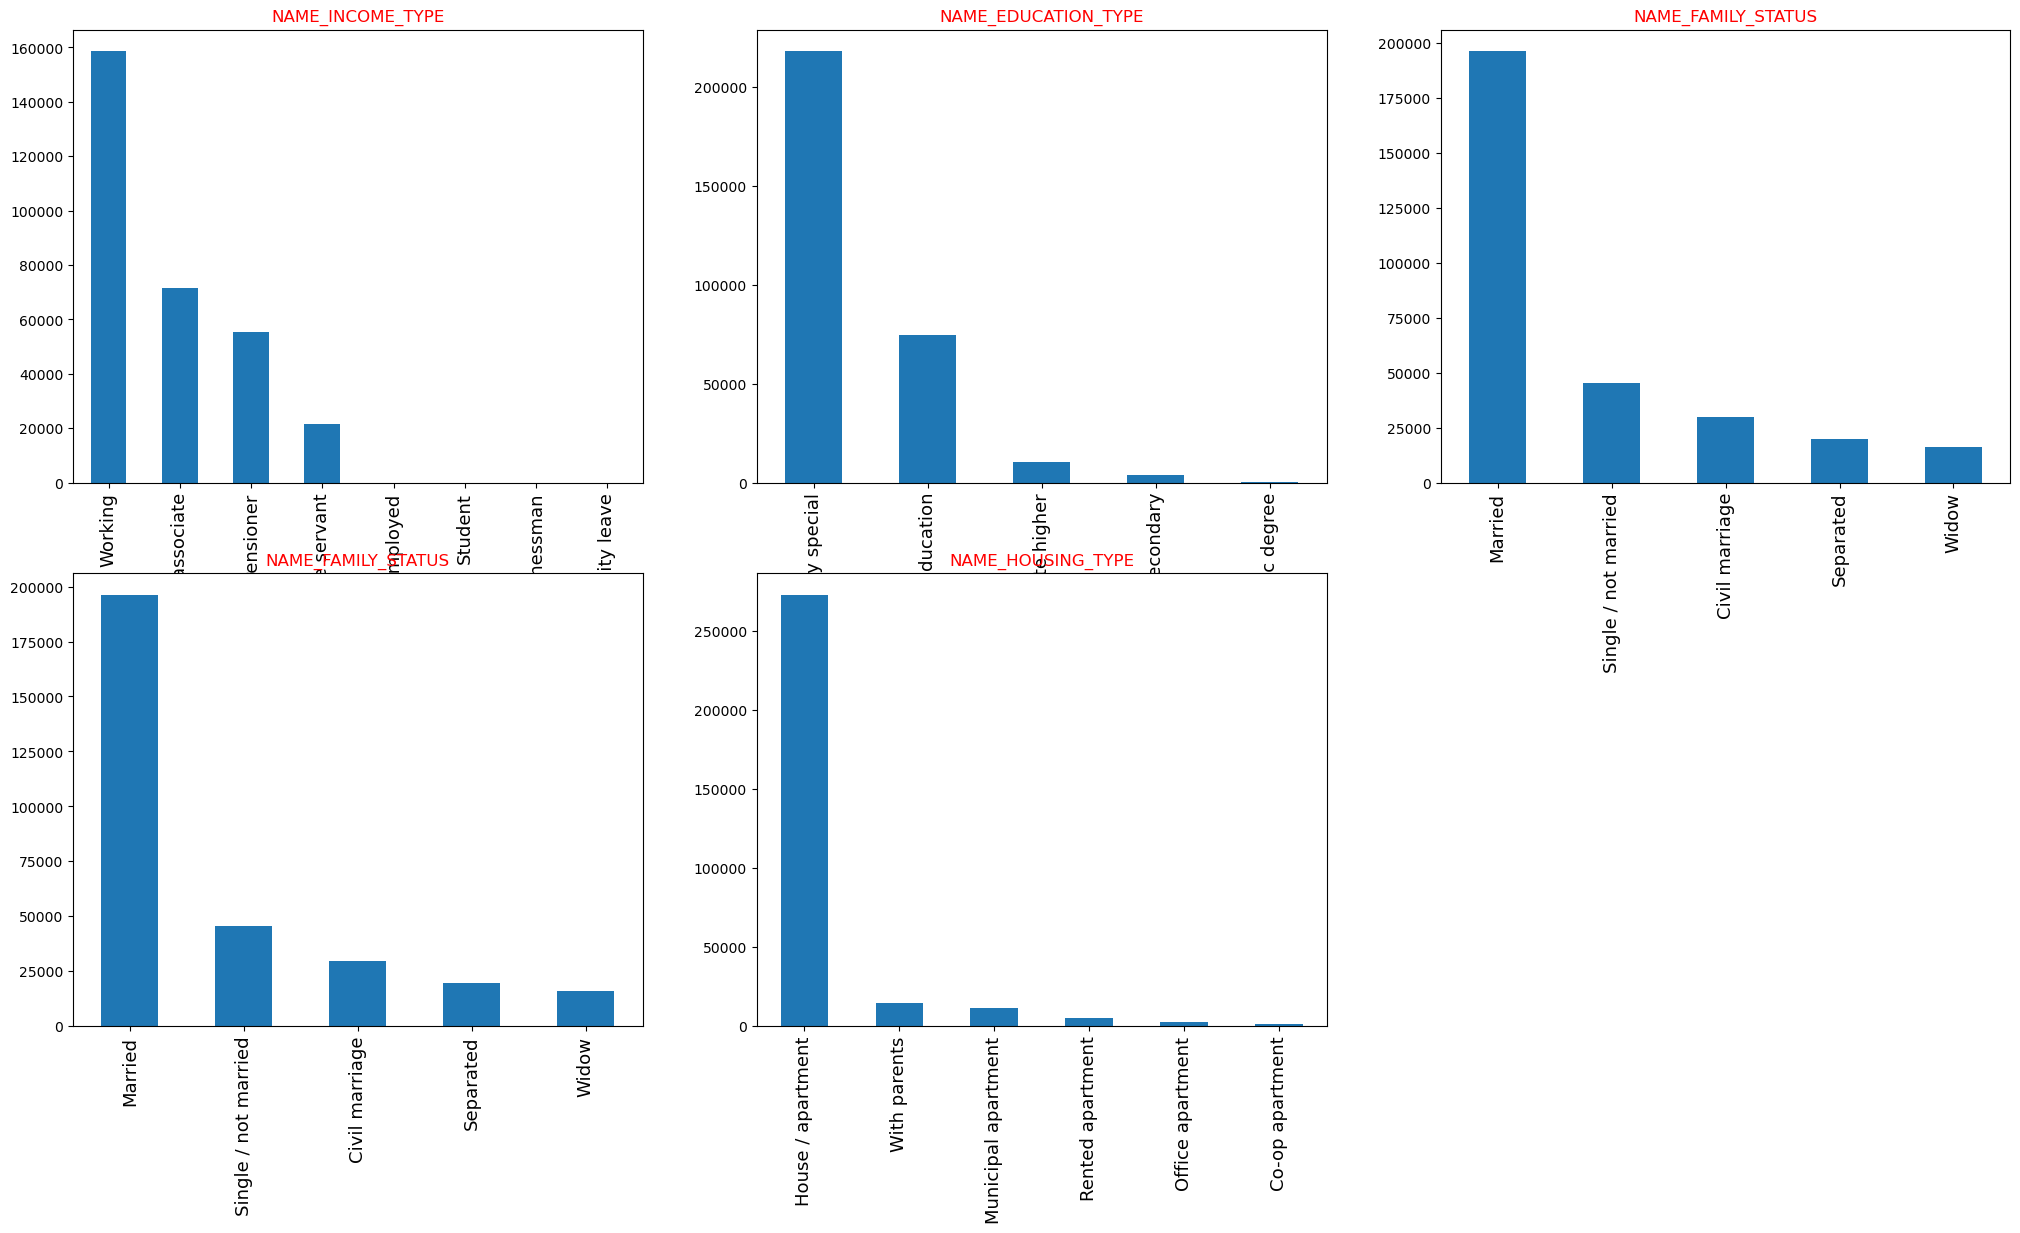

In [ ]:
variable_list = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
x = 0
plt.figure(figsize = (25,20))
for variable in variable_list:
    x += 1
    plt.subplot(3,3,x)
    plt.title(variable, color = 'red')
    app_df[variable].value_counts().plot(kind = 'bar')
    print(app_df[variable].value_counts(normalize=True)*100,"\n")
    plt.xticks(rotation= 90, fontsize = 13)

**Observations:**
- **NAME_INCOME_TYPE**: Working, Commercial associate and Pensioner are the one with higher percentage of applicants.
- **NAME_EDUCATION_TYPE**: Most of the loan provided to Secondary or for Higher education purposes.
- **NAME_FAMILY_STATUS**: Most of the loan applicants are Married.
- **NAME_HOUSING_TYPE**: The applicants are staying mostly in their own house else in apartments.

### Graphical Analysis

In [ ]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307233 non-null  object 
 13 

In [ ]:
irrelevant_columns = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
irrelevant_columns

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [ ]:
# Now, we drop these irrelevant columns
app_df=app_df.drop(irrelevant_columns,axis=1)

In [ ]:
app_df.shape

(307233, 54)

- **Now, the no.of.columns is reduced to 54.**

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

- Let's now analyze the "FLAG_DOCUMENT" columns.

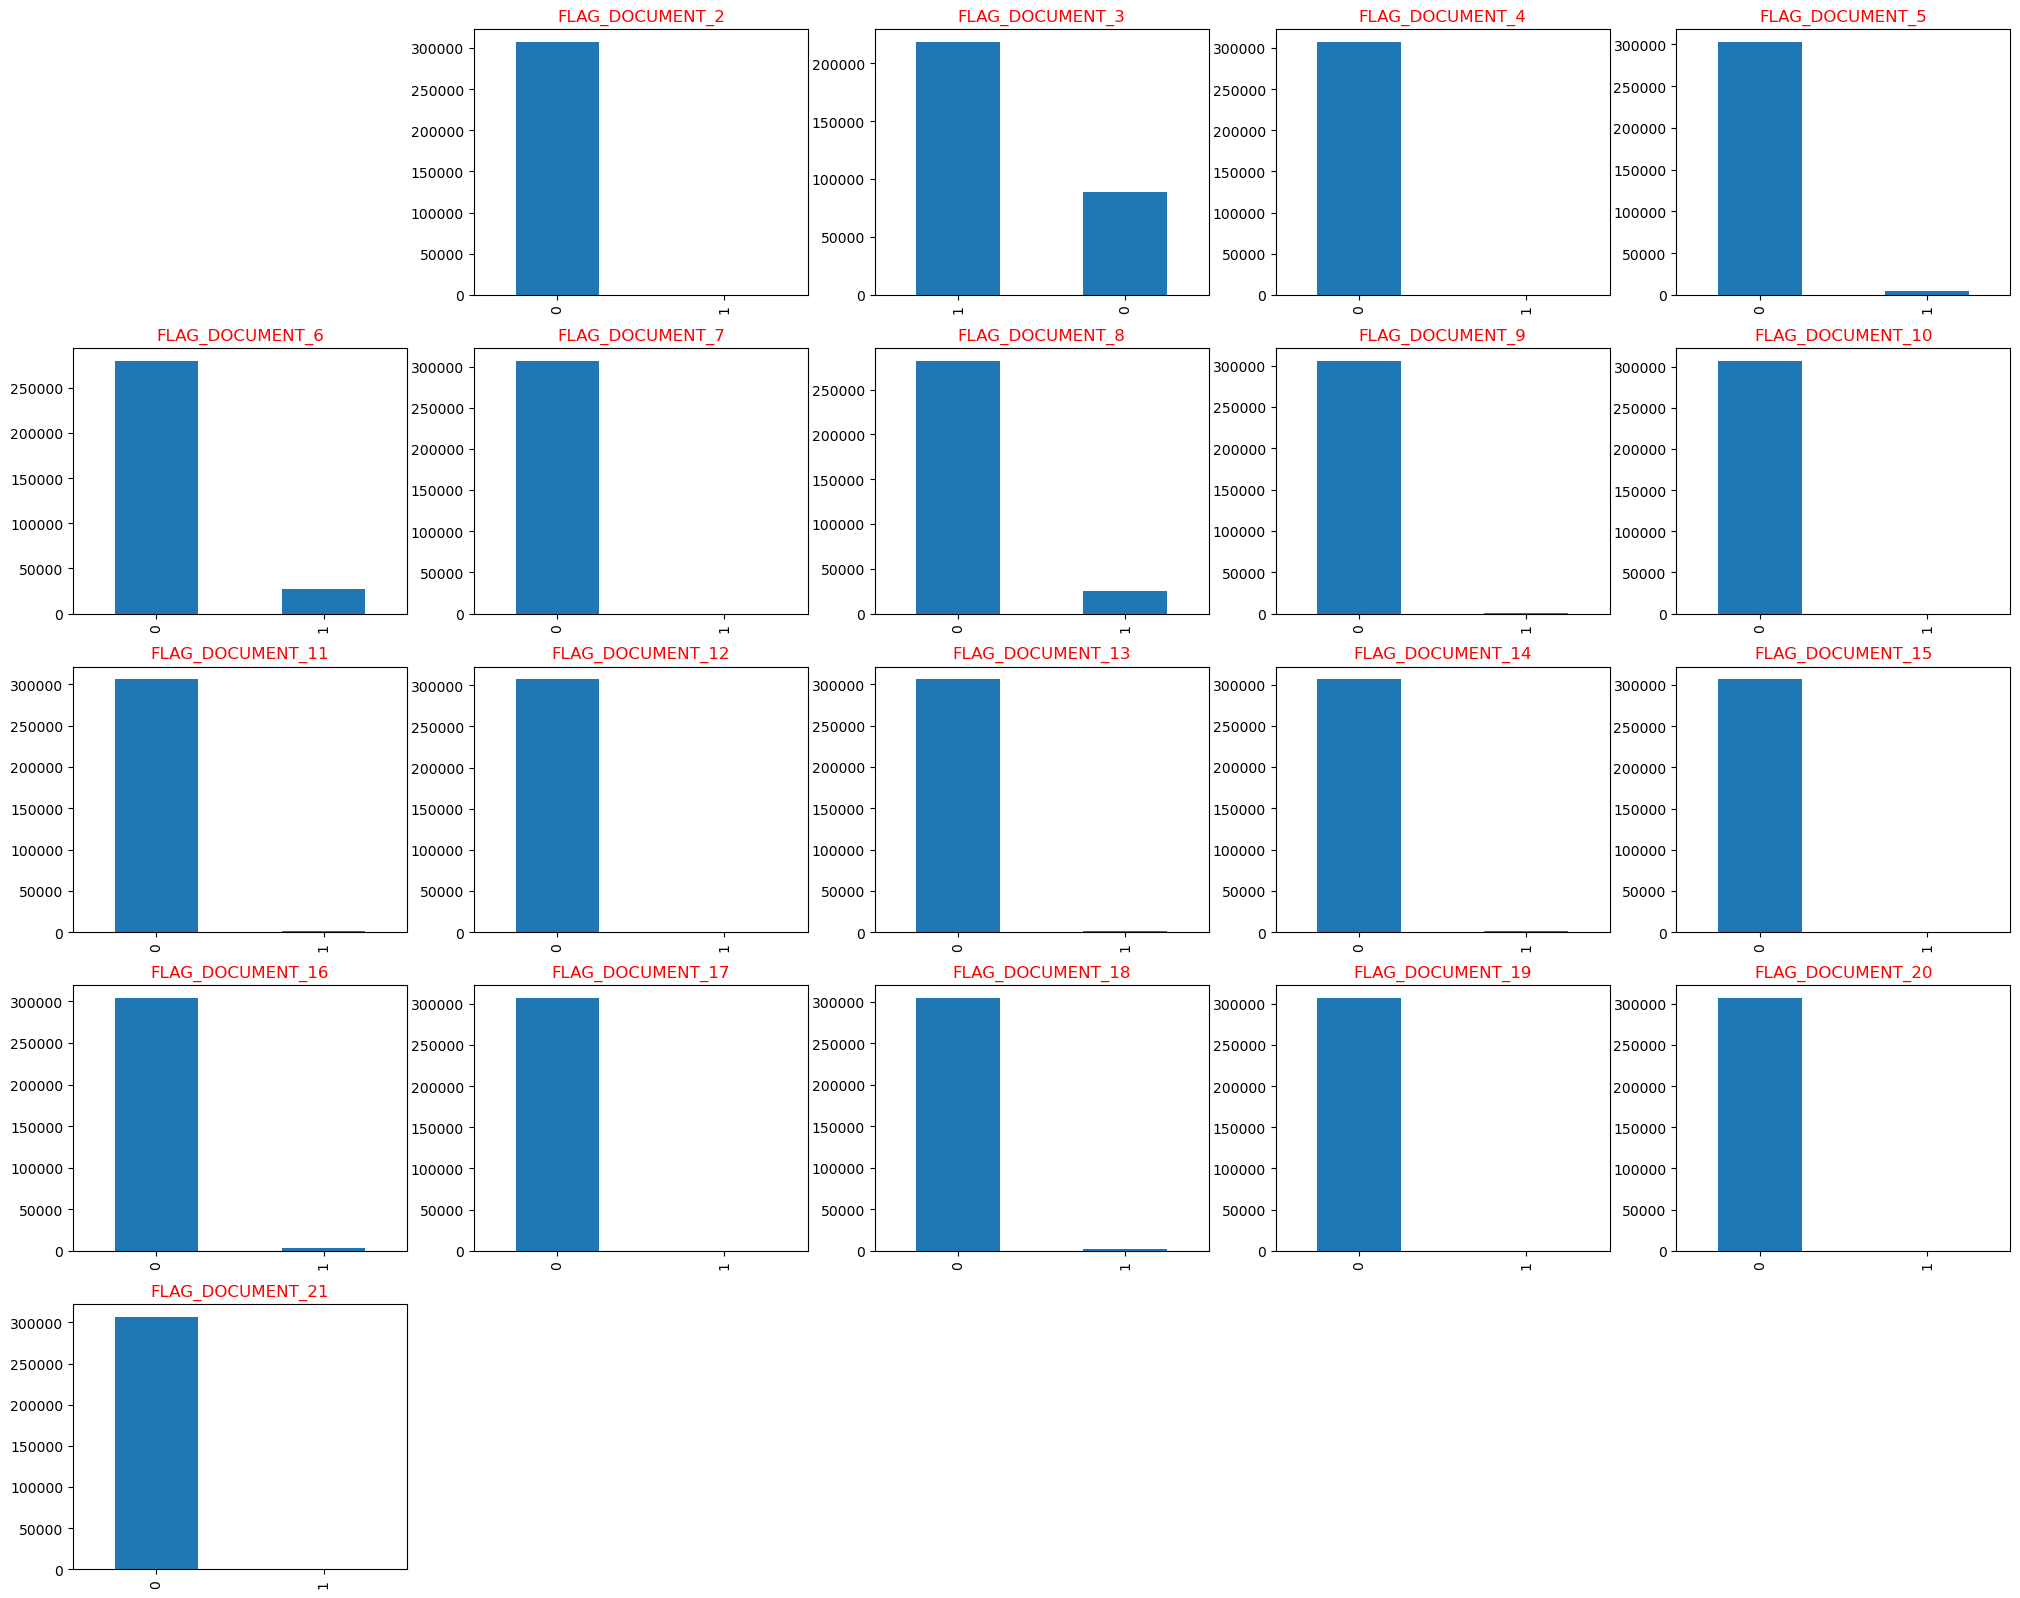

In [ ]:
flag_list=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
plt.figure(figsize=(25,20))
x=1
for flag in flag_list:
    x+=1
    plt.subplot(5,5,x)
    app_df[flag].value_counts().plot(kind="bar")
    plt.title(flag,color="red");

**Observation:**
- Most of the flags document are having values 0 more means those documents are submitted. Only in flag_document-3,6 and 8 little bit more but we dont need to worry about these columns. As every documents seems submitted perfectly. So, we can drop these columns now except flag-3 and flag -6 and flag-8.

In [ ]:
app_df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],inplace=True,axis=1)

In [ ]:
app_df.shape

(307233, 37)

**After dropping those Flag columns, the columns are further reduced to 37 now.**

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307233 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307233 non-null  int64  
 1   TARGET                       307233 non-null  int64  
 2   NAME_CONTRACT_TYPE           307233 non-null  object 
 3   CODE_GENDER                  307233 non-null  object 
 4   FLAG_OWN_CAR                 307233 non-null  object 
 5   FLAG_OWN_REALTY              307233 non-null  object 
 6   CNT_CHILDREN                 307233 non-null  int64  
 7   AMT_INCOME_TOTAL             307233 non-null  float64
 8   AMT_CREDIT                   307233 non-null  float64
 9   AMT_ANNUITY                  307221 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307233 non-null  object 
 12  NAME_EDUCATION_TYPE          307233 non-null  object 
 13 

### Univariate Analysis

F    202263
M    104970
Name: CODE_GENDER, dtype: int64


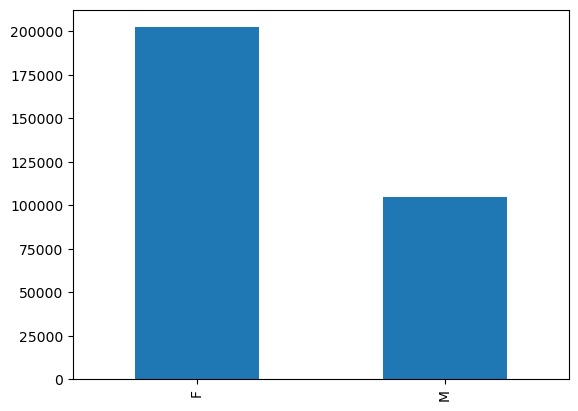

In [ ]:
print(app_df.CODE_GENDER.value_counts())
app_df.CODE_GENDER.value_counts().plot.bar();

**Observation:**
- Number of females are more than males.

**The list of defaulters who are now unable to pay their loan bill.**

In [ ]:
target_value_1=app_df[(app_df.TARGET==1)]
target_value_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...  EXT_SOURCE_3 FLAG_DOCUMENT_3 FLAG_DOCUMENT_6 FLAG_DOCUMENT_8  \
0   ...      0.139376               1               0               0   
26  ...      0.190706               1               0               0   
40  ...      0.320163               1               0               0   
42  ...      0.399676               1               0               0   
81  ...      0.720944               0               1               0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
26                        0.0                        0.0   
40                        0.0                        0.0   
42                        0.0                        0.0   
81                        0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        2.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0                        1.0  
26                        2.0                        2.0  
40                        0.0                        4.0  
42                        0.0                        2.0  
81                        0.0                        0.0  

[5 rows x 37 columns]

**List of Non-Defaulters who are paying their loan bills:**

In [ ]:
target_value_0=app_df[(app_df.TARGET==0)]
target_value_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  EXT_SOURCE_3 FLAG_DOCUMENT_3 FLAG_DOCUMENT_6 FLAG_DOCUMENT_8  \
1  ...      0.510853               1               0               0   
2  ...      0.729567               0               0               0   
3  ...      0.510853               1               0               0   
4  ...      0.510853               0               0               1   
5  ...      0.621226               1               0               0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   
5                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
1                        0.0                        0.0  
2                        0.0                        0.0  
3                        0.0                        0.0  
4                        0.0                        0.0  
5                        1.0                        1.0  

[5 rows x 37 columns]

**Defaulters based on Gender:**

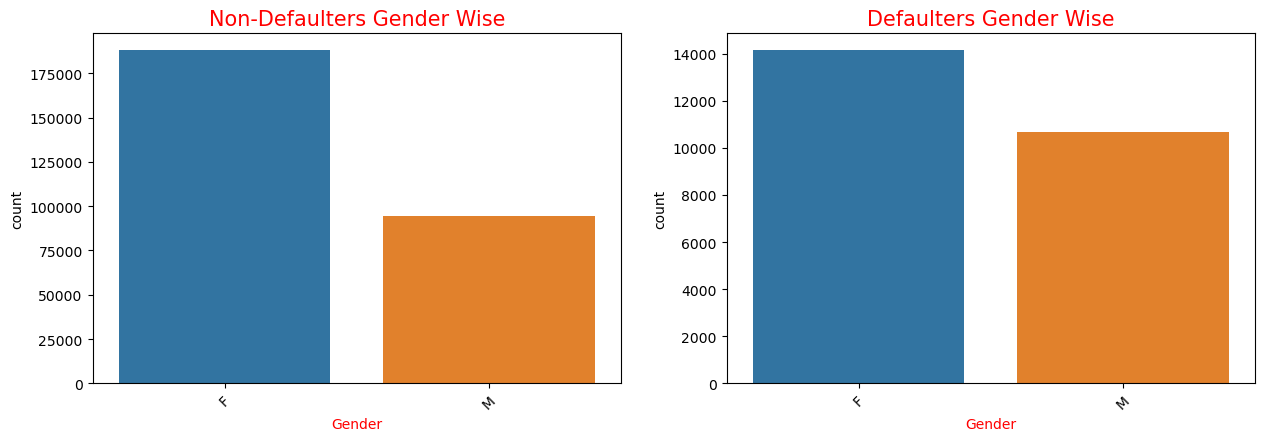

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.CODE_GENDER,order=target_value_0.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Gender",color="red",loc="center")
plt.title("Non-Defaulters Gender Wise", color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.CODE_GENDER,order=target_value_1.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Gender",color="red",loc="center")
plt.title("Defaulters Gender Wise", color="red",fontsize=15)
plt.show()

**Observations:**
- It's evident that the No.of. females are paying their bills correctly compared to males.
- Also, No.of females is greater than males in the Defaulters case too.

### FLAG_OWN_CAR

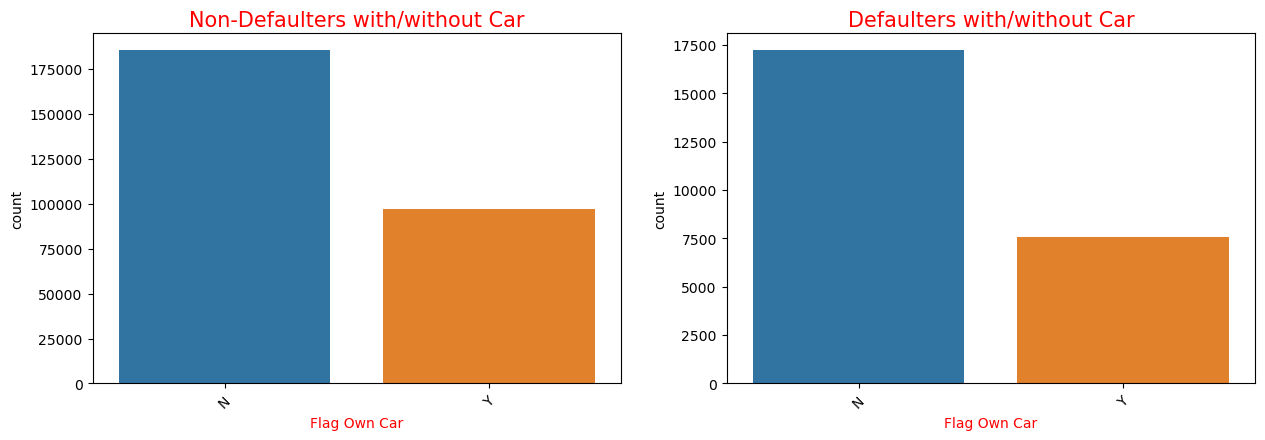

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.FLAG_OWN_CAR,order=target_value_0.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Flag Own Car",color="red",loc="center")
plt.title("Non-Defaulters with/without Car",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.FLAG_OWN_CAR,order=target_value_1.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Flag Own Car",color="red",loc="center")
plt.title("Defaulters with/without Car",color="red",fontsize=15)
plt.show()


**Summary:**
- Maximum no.of Non-defaulters are not having their own car.
- Maximum Defaulters also not having their own car.

### FLAG_OWN_REALTY

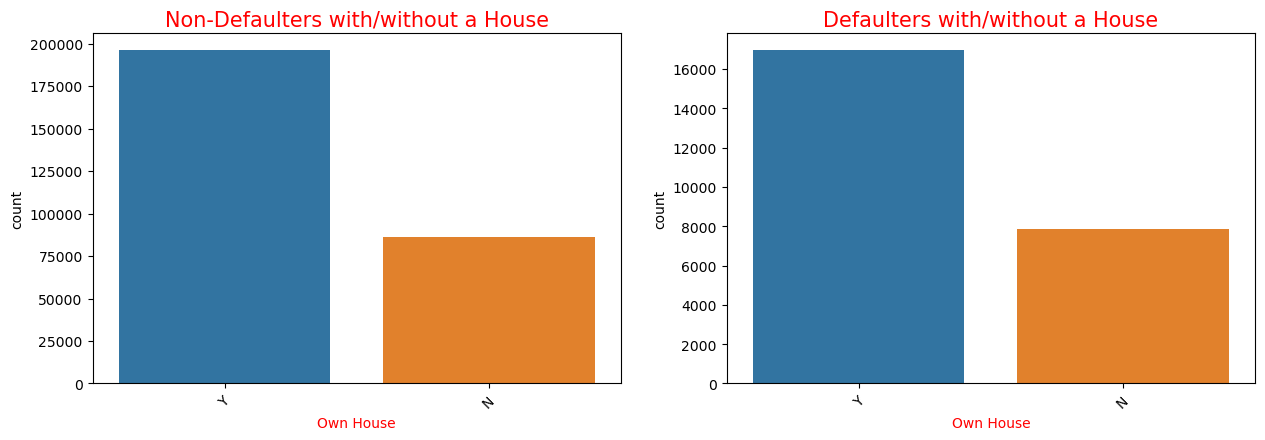

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.FLAG_OWN_REALTY,order=target_value_0.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Own House",color="red",loc="center")
plt.title("Non-Defaulters with/without a House",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.FLAG_OWN_REALTY,order=target_value_1.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Own House",color="red",loc="center")
plt.title("Defaulters with/without a House",color="red",fontsize=15)
plt.show()


**Observation**:
- Most of Non Defaulters and Defaulters are having their own house/flat.

### NAME_CONTRACT_TYPE

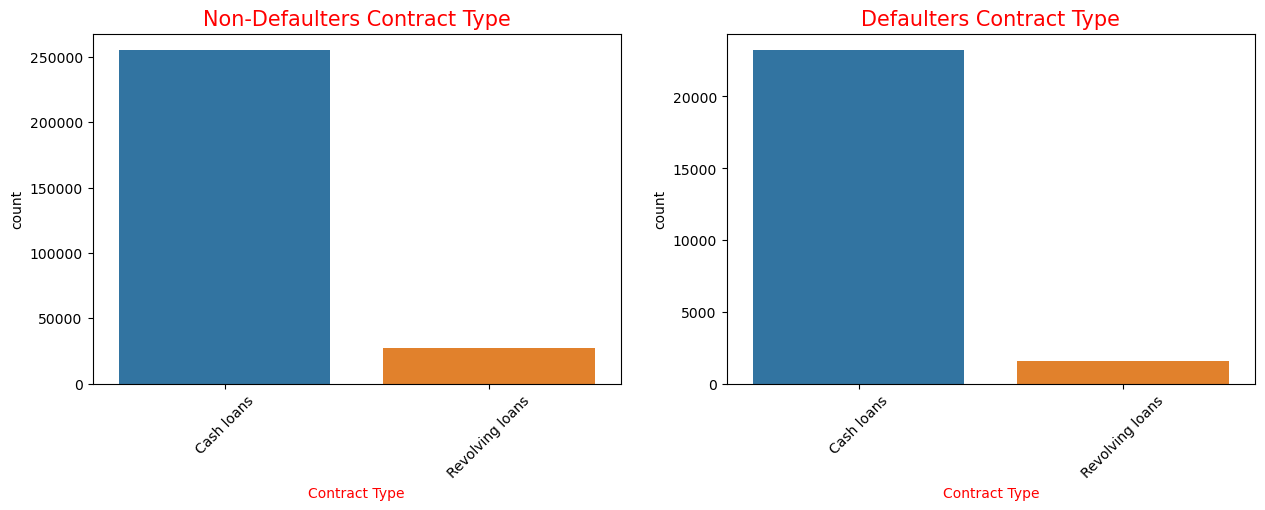

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_CONTRACT_TYPE,order=target_value_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Contract Type",color="red",loc="center")
plt.title("Non-Defaulters Contract Type",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_CONTRACT_TYPE,order=target_value_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Contract Type",color="red",loc="center")
plt.title("Defaulters Contract Type",color="red",fontsize=15)
plt.show()

**Observation:**
- It is clear from the above graph that the Defaulters and Non-defaulters both opt for cash loans contract type.

### NAME_INCOME_TYPE

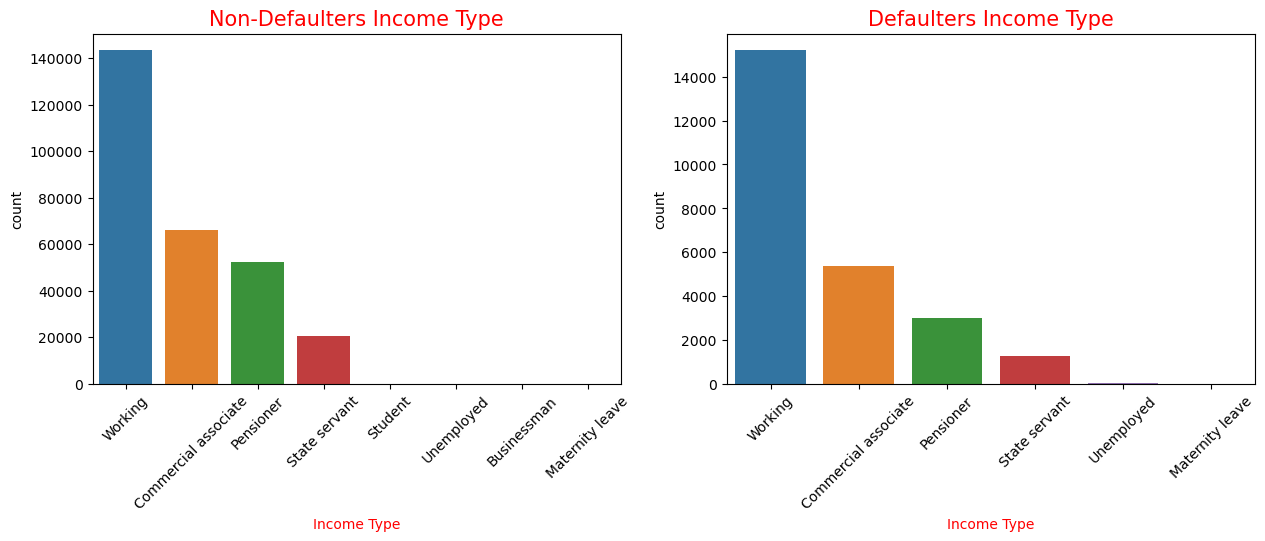

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_INCOME_TYPE,order=target_value_0.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Income Type",color="red",loc="center")
plt.title("Non-Defaulters Income Type",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_INCOME_TYPE,order=target_value_1.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Income Type",color="red",loc="center")
plt.title("Defaulters Income Type",color="red",fontsize=15)
plt.show()

In [ ]:
app_df.NAME_INCOME_TYPE.value_counts()

Working                 158589
Commercial associate     71570
Pensioner                55339
State servant            21680
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

**Observation**:
- The Defaulters are mostly working professionals followed by commercial Associates.

### NAME_EDUCATION_TYPE

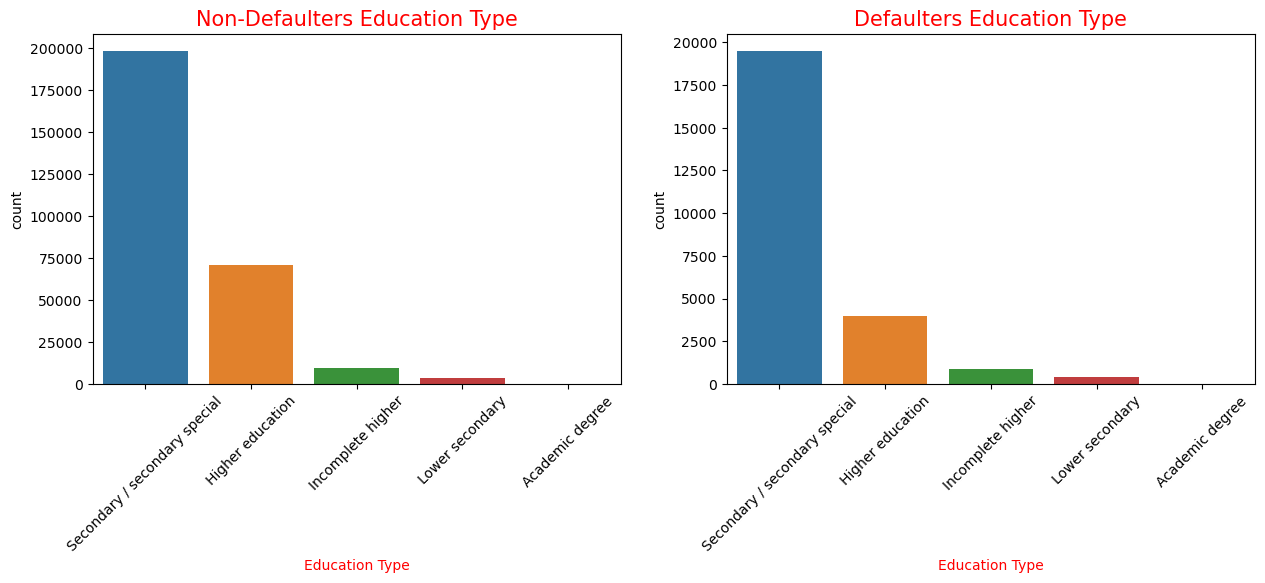

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_EDUCATION_TYPE,order=target_value_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Education Type",color="red",loc="center")
plt.title("Non-Defaulters Education Type",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_EDUCATION_TYPE,order=target_value_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Education Type",color="red",loc="center")
plt.title("Defaulters Education Type",color="red",fontsize=15)
plt.show()

**Summary:**
- The defaulter are mostly having Secondary/Secondary special kind of education.

### NAME_FAMILY_STATUS

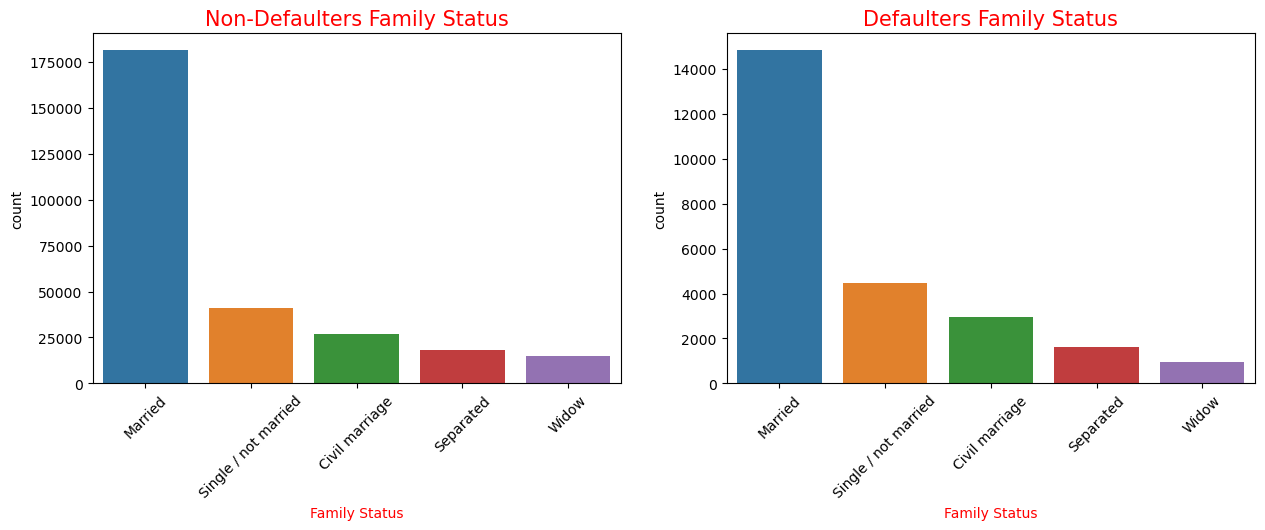

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_FAMILY_STATUS,order=target_value_0.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Family Status",color="red",loc="center")
plt.title("Non-Defaulters Family Status",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_FAMILY_STATUS,order=target_value_1.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Family Status",color="red",loc="center")
plt.title("Defaulters Family Status",color="red",fontsize=15)
plt.show()

**Observations:**
- Married people are mostly defaulters. After them, Single/Not married category is defaulters.

### NAME_HOUSING_TYPE

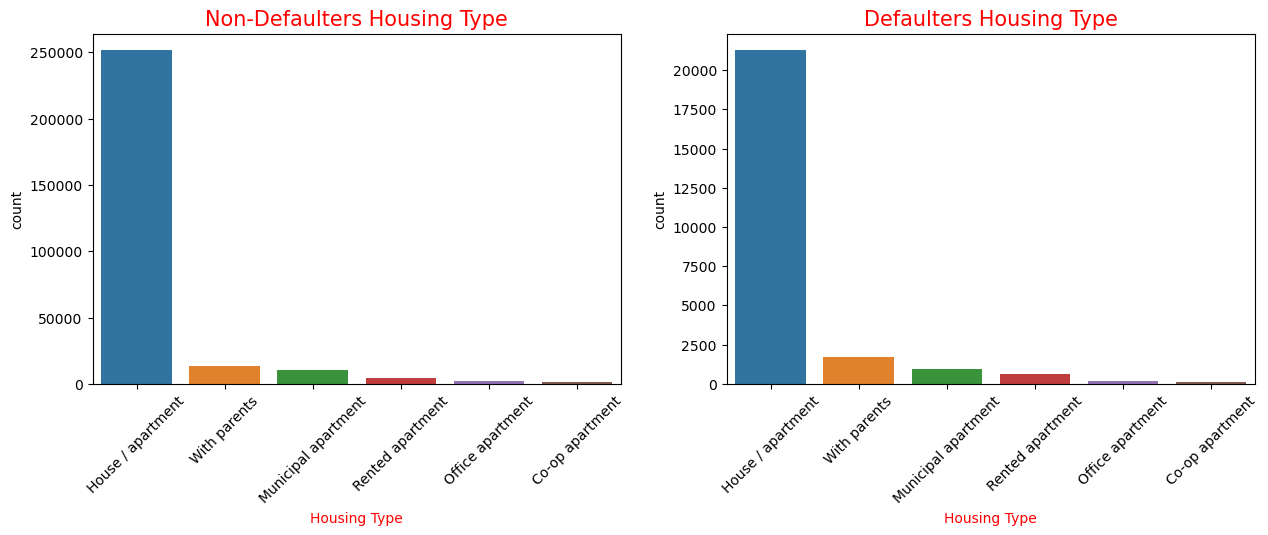

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.NAME_HOUSING_TYPE,order=target_value_0.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Housing Type",color="red",loc="center")
plt.title("Non-Defaulters Housing Type",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.NAME_HOUSING_TYPE,order=target_value_1.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Housing Type",color="red",loc="center")
plt.title("Defaulters Housing Type",color="red",fontsize=15)
plt.show()

**Summary:**
- Most of the defaulters are having their own house/apartment.

### ORGANIZATION_TYPE

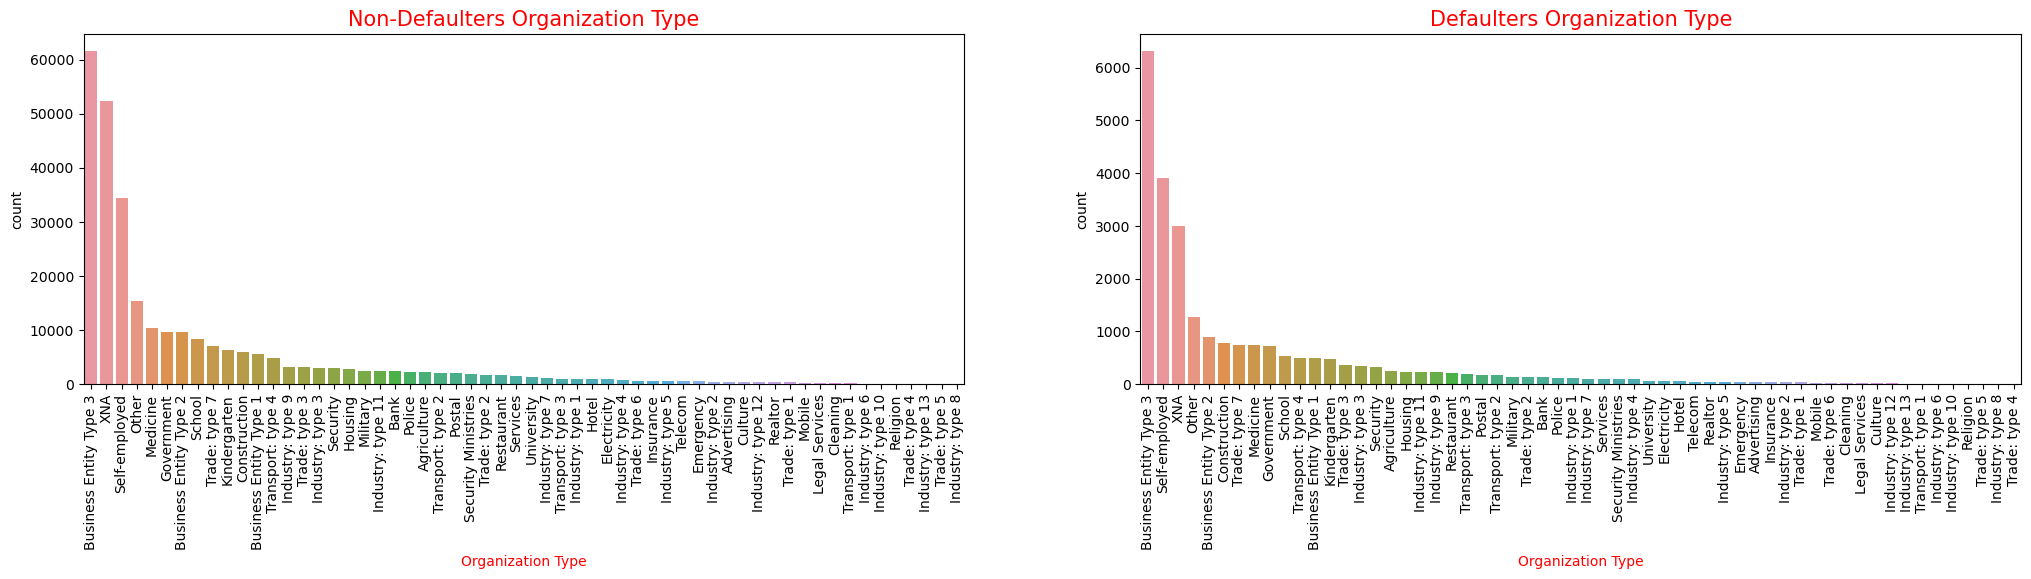

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.ORGANIZATION_TYPE,order=target_value_0.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel="Organization Type",color="red",loc="center")
plt.title("Non-Defaulters Organization Type",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.ORGANIZATION_TYPE,order=target_value_1.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel(xlabel="Organization Type",color="red",loc="center")
plt.title("Defaulters Organization Type",color="red",fontsize=15)
plt.show()

In [ ]:
(app_df.ORGANIZATION_TYPE=="XNA").mean()*100

18.01629382260369

**Summary:**
- Most of the Defaulters are working as Business Entry Type 3.

### OCCUPATION_TYPE

In [ ]:
app_df.OCCUPATION_TYPE.value_counts()

Laborers                 55134
Sales staff              32064
Core staff               27531
Managers                 21348
Drivers                  18590
High skill tech staff    11371
Accountants               9802
Medicine staff            8528
Security staff            6713
Cooking staff             5940
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64

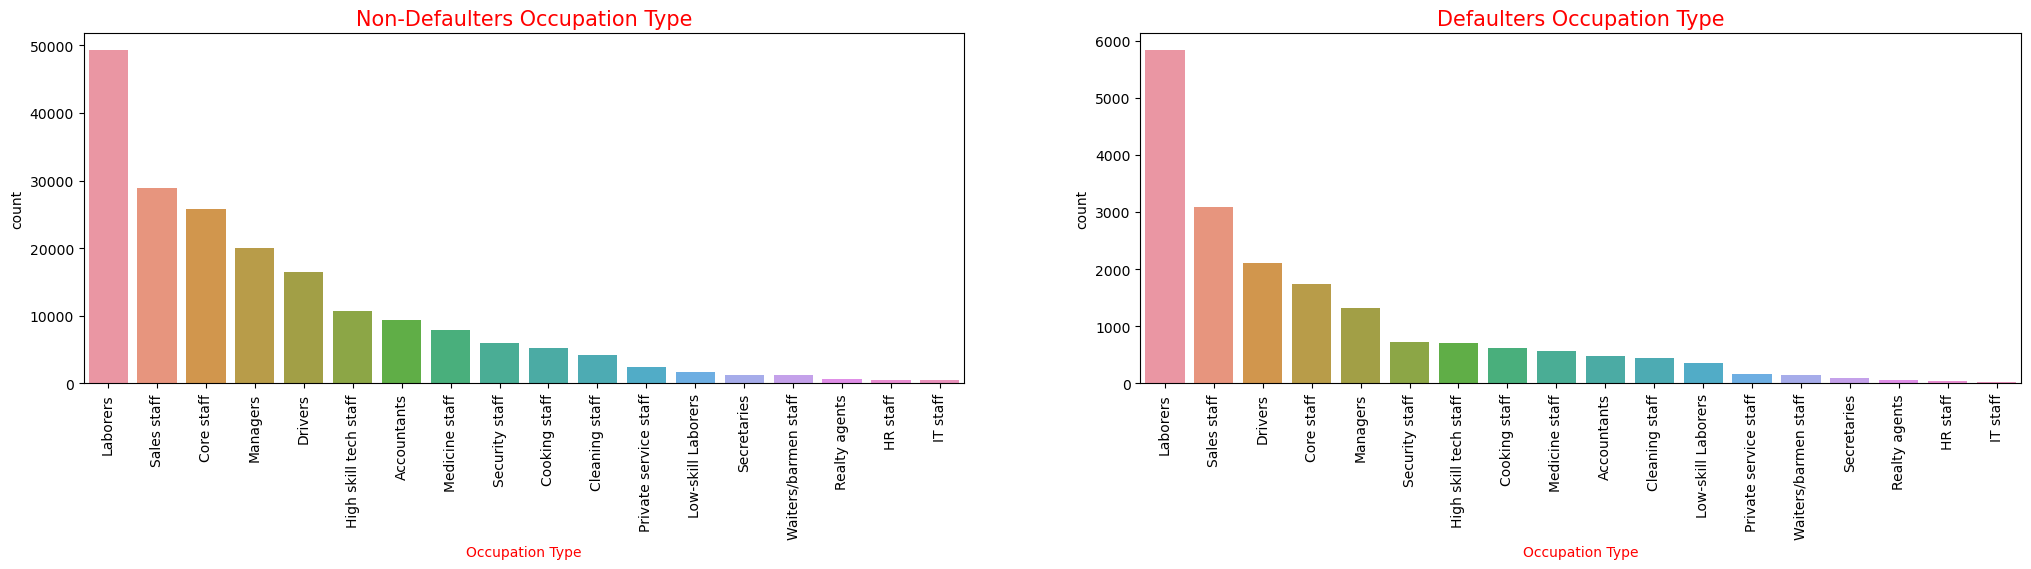

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(target_value_0.OCCUPATION_TYPE,order=target_value_0.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel="Occupation Type",color="red",loc="center")
plt.title("Non-Defaulters Occupation Type",color="red",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(target_value_1.OCCUPATION_TYPE,order=target_value_1.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel(xlabel="Occupation Type",color="red",loc="center")
plt.title("Defaulters Occupation Type",color="red",fontsize=15)
plt.show()

**Summary:**
- Most of the defaulters are labours by their occupation. Thelabours are the one who is lower skilled people so,they are struggling with the loan bill payment and becoming defaulters.

### Univariate Analysis for Continuous Variable

---



---



In [ ]:
continuous_data_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3','Age']
print(len(continuous_data_cols))

8


#### AMT_INCOME_TOTAL


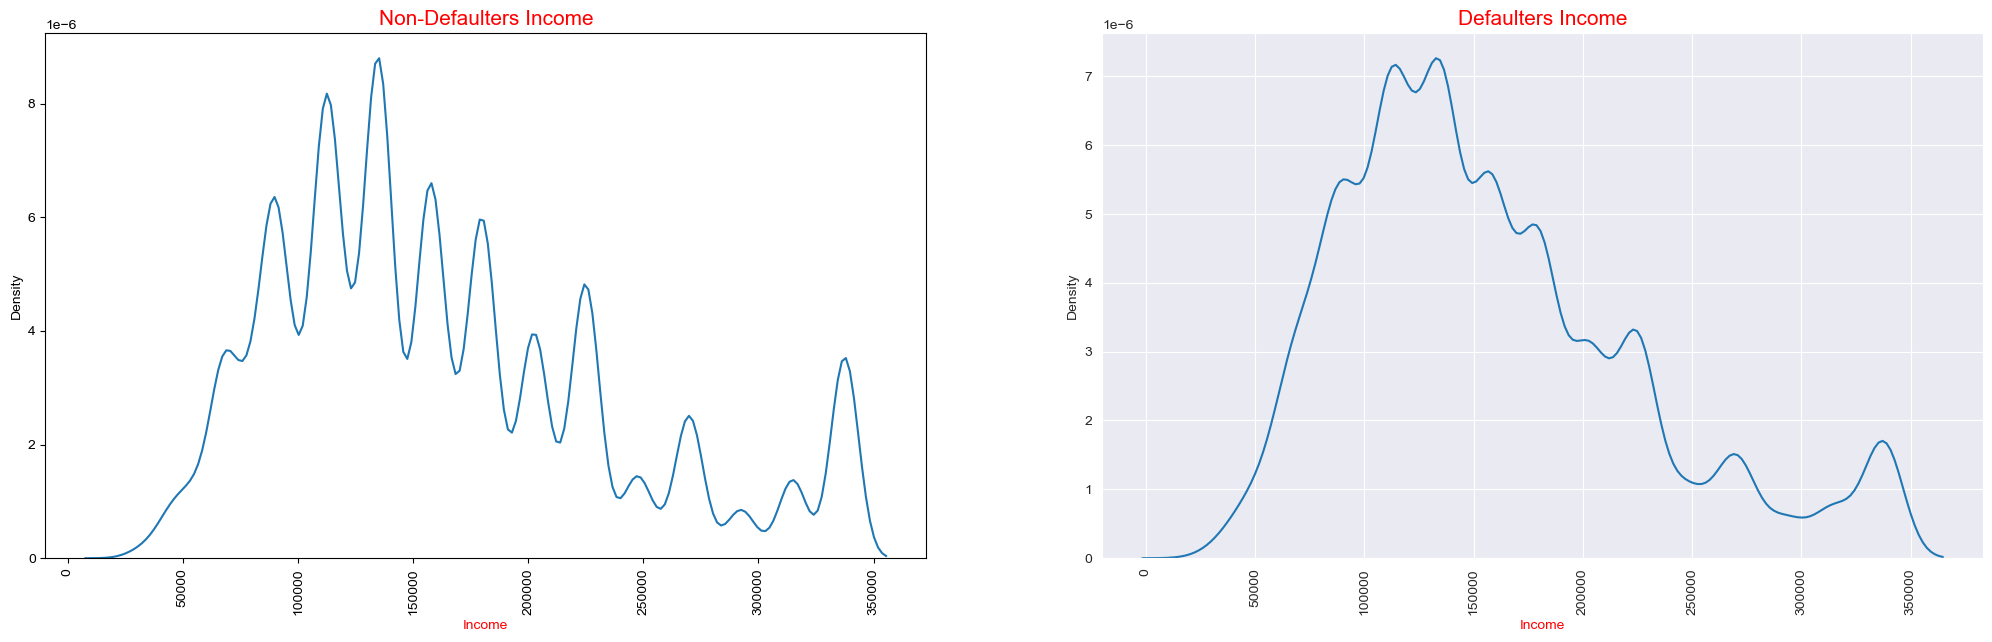

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.distplot(target_value_0.AMT_INCOME_TOTAL,hist=False)
plt.xticks(rotation=90)
plt.xlabel(xlabel="Income",color="red",loc="center")
plt.title("Non-Defaulters Income",color="red",fontsize=15)
sns.set_style("darkgrid")

plt.subplot(2,2,2)
sns.distplot(target_value_1.AMT_INCOME_TOTAL,hist=False,kde=True)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel(xlabel="Income",color="red",loc="center")
plt.title("Defaulters Income",color="red",fontsize=15)
sns.set_style("darkgrid")
plt.show()

**Summary:**
- Most of the defaulters are earning between 1 lakhs to 1.7 lakhs annually.

#### AMT_CREDIT

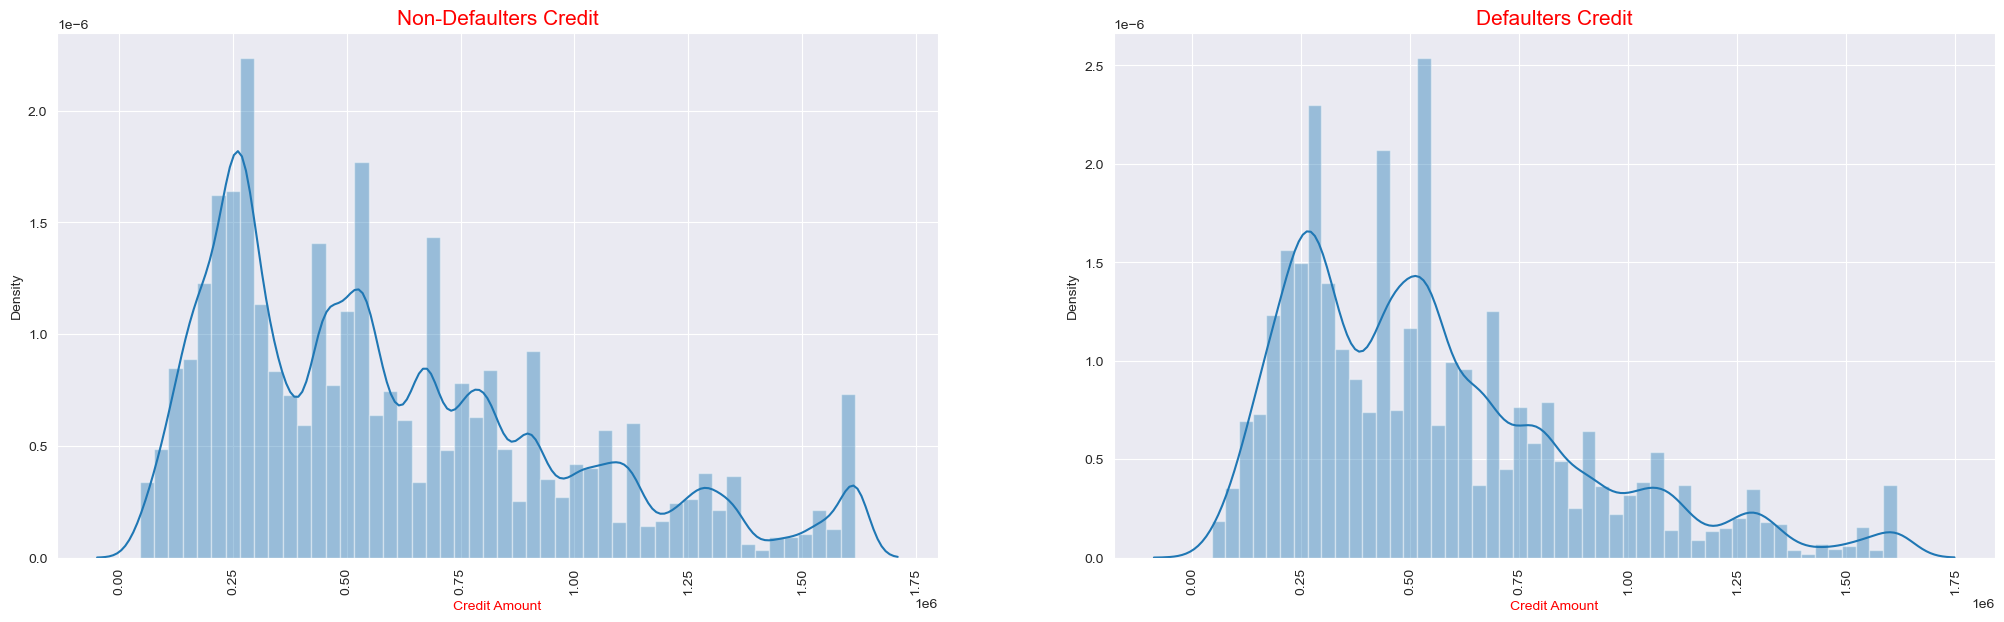

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.distplot(target_value_0.AMT_CREDIT,hist=True,kde=True)
plt.xticks(rotation=90)
plt.xlabel(xlabel="Credit Amount",color="red",loc="center")
plt.title("Non-Defaulters Credit",color="red",fontsize=15)
sns.set_style("darkgrid")

plt.subplot(2,2,2)
sns.distplot(target_value_1.AMT_CREDIT,hist=True,kde=True)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel(xlabel="Credit Amount",color="red",loc="center")
plt.title("Defaulters Credit",color="red",fontsize=15)
sns.set_style("darkgrid")
plt.show()

**Summary:**
- We can see that the lesser the credit amount of the loan, the more chances of being a defaulter.We can see that the spike is high till 0.50 which is 5000000.

#### AMT_ANNUITY

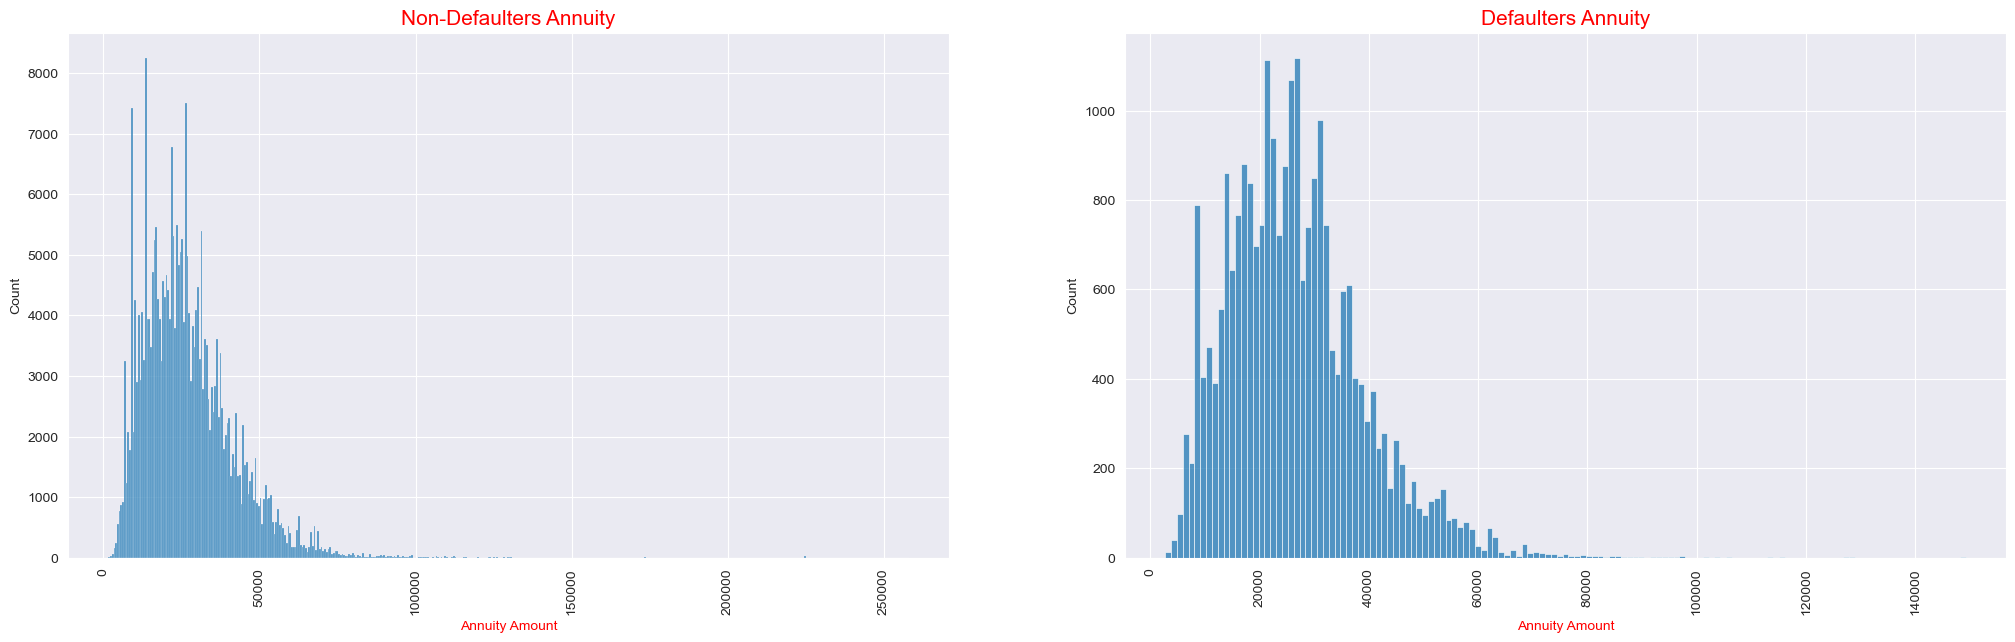

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.histplot(target_value_0.AMT_ANNUITY)
plt.xticks(rotation=90)
plt.xlabel(xlabel="Annuity Amount",color="red",loc="center")
plt.title("Non-Defaulters Annuity",color="red",fontsize=15)
sns.set_style("darkgrid")

plt.subplot(2,2,2)
sns.histplot(target_value_1.AMT_ANNUITY)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel(xlabel="Annuity Amount",color="red",loc="center")
plt.title("Defaulters Annuity",color="red",fontsize=15)
sns.set_style("darkgrid")
plt.show()

**Summary:**
- Defaulters are having loan annuity between 15000 to 30000.

#### AMT_GOODS_PRICE

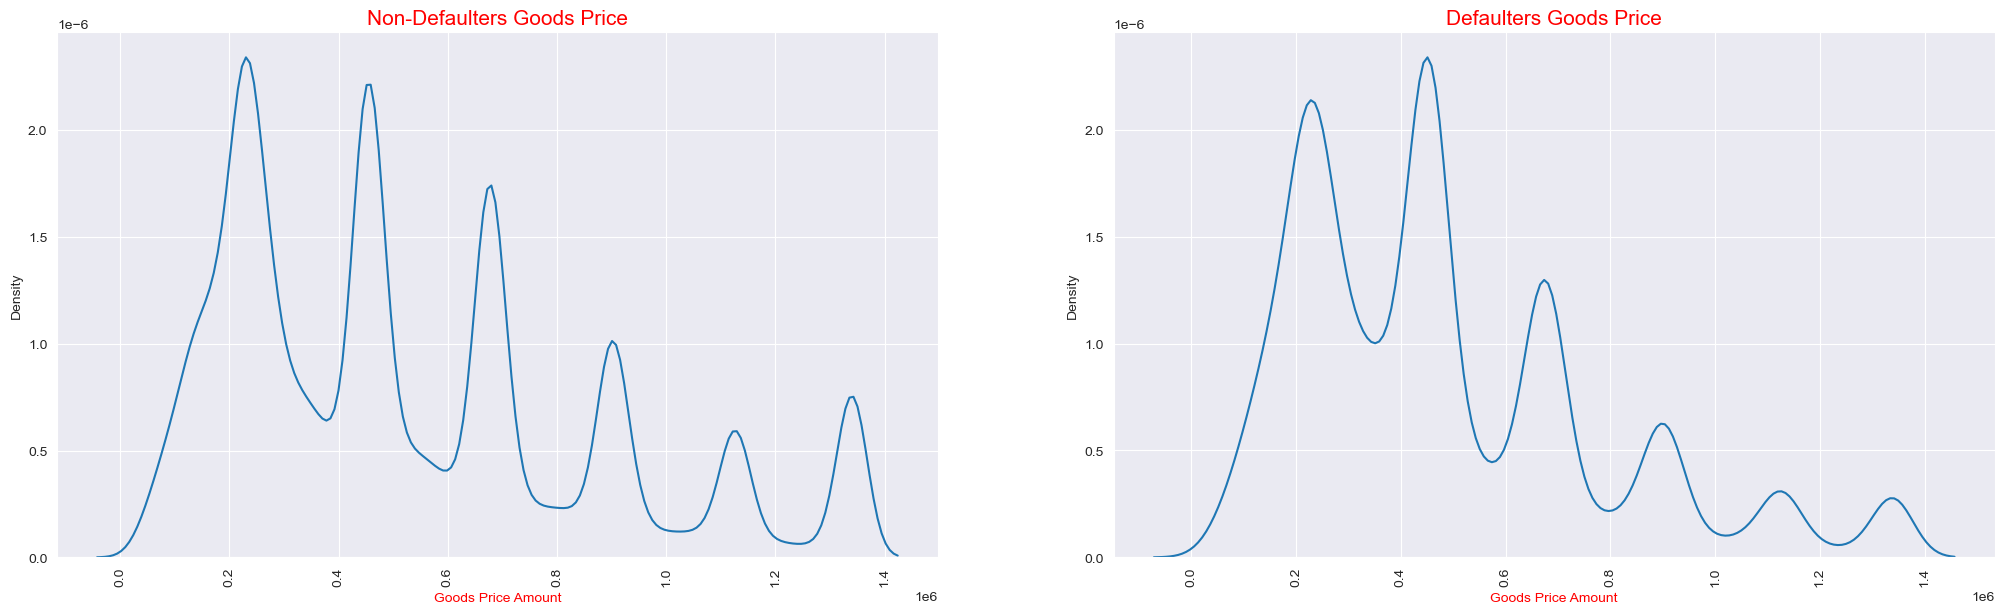

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.kdeplot(target_value_0.AMT_GOODS_PRICE)
plt.xticks(rotation=90)
plt.xlabel(xlabel="Goods Price Amount",color="red",loc="center")
plt.title("Non-Defaulters Goods Price",color="red",fontsize=15)
sns.set_style("darkgrid")

plt.subplot(2,2,2)
sns.kdeplot(target_value_1.AMT_GOODS_PRICE)
plt.xticks(rotation=90,fontsize=10)
plt.xlabel(xlabel="Goods Price Amount",color="red",loc="center")
plt.title("Defaulters Goods Price",color="red",fontsize=15)
sns.set_style("darkgrid")
plt.show()

### Bivariate Analysis

In [ ]:
continuous_data_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'Age']

In [ ]:
categorical_data

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
0                       WEDNESDAY  Business Entity Type 3  
1                          MONDAY                  School  
2                          MONDAY              Government  
3                       WEDNESDAY  Business Entity Type 3  
4                        THURSDAY                Religion  
...                           ...                     ...  
307506                   THURSDAY                Services  
307507                     MONDAY                     XNA  
307508                   THURSDAY                  School  
307509                  WEDNESDAY  Business Entity Type 1  
307510                   THURSDAY  Business Entity Type 3  

[307511 rows x 12 columns]

In [ ]:
categorical_data_cols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS']
print(len(categorical_data_cols))
continuous_data_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3']
print(len(continious_data_cols))

12
8


**Continuous variables can be seen as numerical variables. We can check the correlation between these variables.**

In [ ]:
corr_for_defaulters=target_value_1[continuous_data_cols]
corr_for_defaulters.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_EMPLOYED  \
0           202500.0    406597.5      24700.5         351000.0            637   
26          112500.0    979992.0      27076.5         702000.0           2628   
40          202500.0   1193580.0      35028.0         855000.0           1262   
42          135000.0    288873.0      16258.5         238500.0           3597   
81           81000.0    252000.0      14593.5         252000.0         365243   

    EXT_SOURCE_2  EXT_SOURCE_3  
0       0.262949      0.139376  
26      0.548477      0.190706  
40      0.306841      0.320163  
42      0.674203      0.399676  
81      0.023952      0.720944

In [ ]:
corr_for_defaulters.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.355803     0.436348         0.357775   
AMT_CREDIT                0.355803    1.000000     0.750721         0.982183   
AMT_ANNUITY               0.436348    0.750721     1.000000         0.752308   
AMT_GOODS_PRICE           0.357775    0.982183     0.752308         1.000000   
DAYS_EMPLOYED            -0.125535    0.003289    -0.081363         0.008149   
EXT_SOURCE_2              0.145069    0.120587     0.116048         0.130552   
EXT_SOURCE_3             -0.086962    0.052939     0.032394         0.054211   

                  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3  
AMT_INCOME_TOTAL      -0.125535      0.145069     -0.086962  
AMT_CREDIT             0.003289      0.120587      0.052939  
AMT_ANNUITY           -0.081363      0.116048      0.032394  
AMT_GOODS_PRICE        0.008149      0.130552      0.054211  
DAYS_EMPLOYED          1.000000      0.000963      0.082336  
EXT_SOURCE_2           0.000963      1.000000      0.048949  
EXT_SOURCE_3           0.082336      0.048949      1.000000

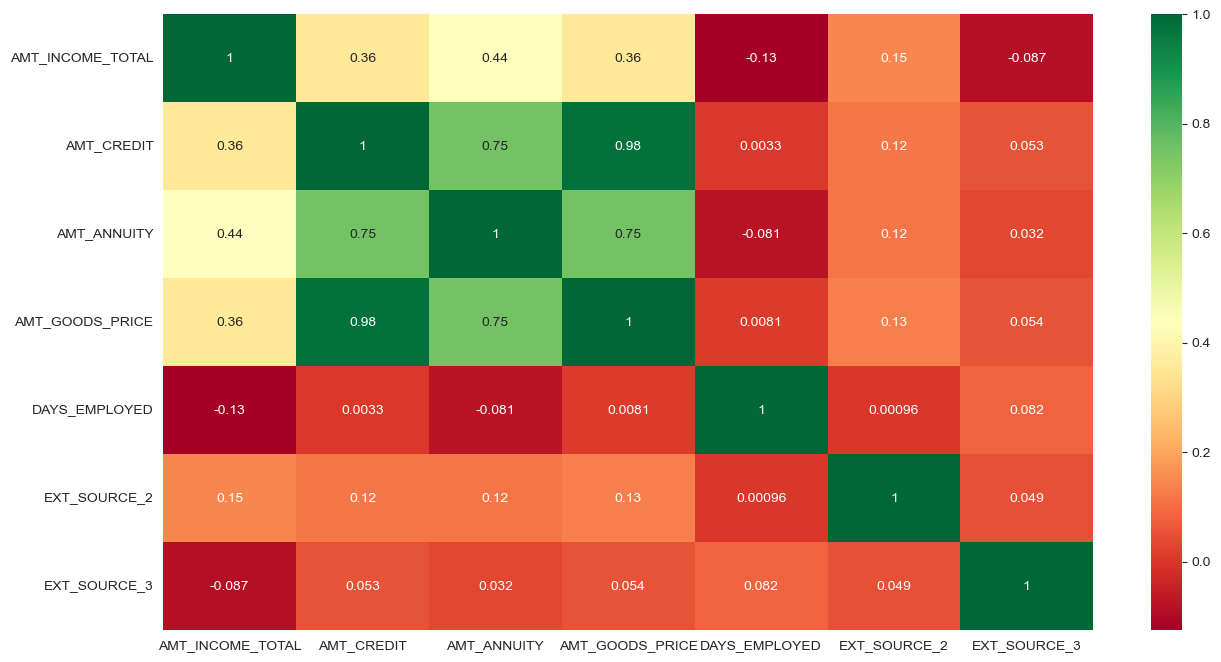

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_for_defaulters.corr(),cmap="RdYlGn",annot=True)
plt.show()

**Summary:** I have taken the defaulter dataframe here.
The more the correlated percentage means the high value for being a defaulter.
- 0.98% = AMT_CREDIT & AMT_GOODS_PRICE.
- 0.75% = AMT_CREDIT & AMT_ANNUITY.
- 0.75% = AMT_GOODS_PRICE & AMT_ANNUITY.
- 0.58% = DAYS_EMPLOYED.

**In a similar way, we can check for the non-defaulters**

In [ ]:
corr_for_non_defaulters=target_value_0[continuous_data_cols]
corr_for_non_defaulters.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_EMPLOYED  \
1          270000.0   1293502.5      35698.5        1129500.0           1188   
2           67500.0    135000.0       6750.0         135000.0            225   
3          135000.0    312682.5      29686.5         297000.0           3039   
4          121500.0    513000.0      21865.5         513000.0           3038   
5           99000.0    490495.5      27517.5         454500.0           1588   

   EXT_SOURCE_2  EXT_SOURCE_3  
1      0.622246      0.510853  
2      0.555912      0.729567  
3      0.650442      0.510853  
4      0.322738      0.510853  
5      0.354225      0.621226

In [ ]:
corr_for_non_defaulters.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.414053     0.487626         0.417680   
AMT_CREDIT                0.414053    1.000000     0.766467         0.985841   
AMT_ANNUITY               0.487626    0.766467     1.000000         0.769771   
AMT_GOODS_PRICE           0.417680    0.985841     0.769771         1.000000   
DAYS_EMPLOYED            -0.185568   -0.071280    -0.105265        -0.069913   
EXT_SOURCE_2              0.172368    0.128416     0.126550         0.135088   
EXT_SOURCE_3             -0.078652    0.032623     0.025004         0.034671   

                  DAYS_EMPLOYED  EXT_SOURCE_2  EXT_SOURCE_3  
AMT_INCOME_TOTAL      -0.185568      0.172368     -0.078652  
AMT_CREDIT            -0.071280      0.128416      0.032623  
AMT_ANNUITY           -0.105265      0.126550      0.025004  
AMT_GOODS_PRICE       -0.069913      0.135088      0.034671  
DAYS_EMPLOYED          1.000000     -0.028562      0.100203  
EXT_SOURCE_2          -0.028562      1.000000      0.076012  
EXT_SOURCE_3           0.100203      0.076012      1.000000

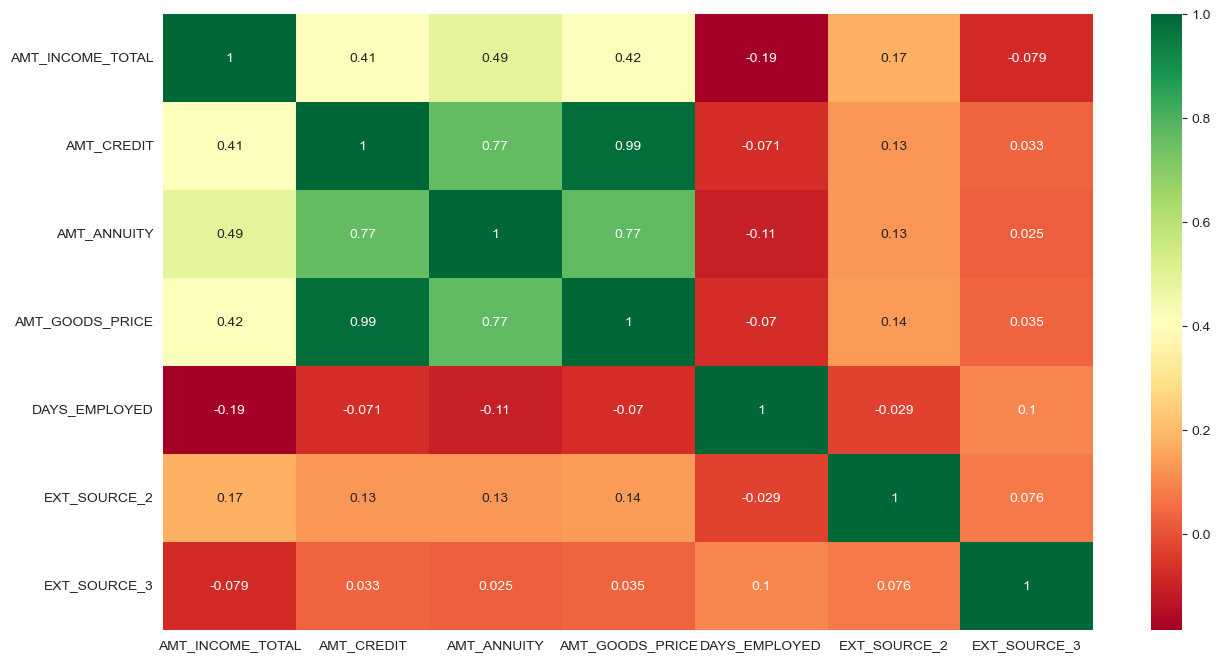

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_for_non_defaulters.corr(),cmap="RdYlGn",annot=True)
plt.show()

**Summary:** I have taken the Non-defaulter dataframe here.
The more the correlated percentage means the high value for being a Non-defaulter.
- 0.99% = AMT_CREDIT & AMT_GOODS_PRICE.
- 0.77% = AMT_CREDIT & AMT_ANNUITY.
- 0.77% = AMT_GOODS_PRICE & AMT_ANNUITY.
- 0.63% = DAYS_EMPLOYED

**We can come to conclusion that there is a similarity between columns when it comes to default and non-default data correlation. The column relation which are showing higher percentage of correlation in Non-defaulters are the one showing in defaulters correlation.**

#### 1.AMT_CREDIT & AMT_INCOME_TOTAL & CODE_GENDER

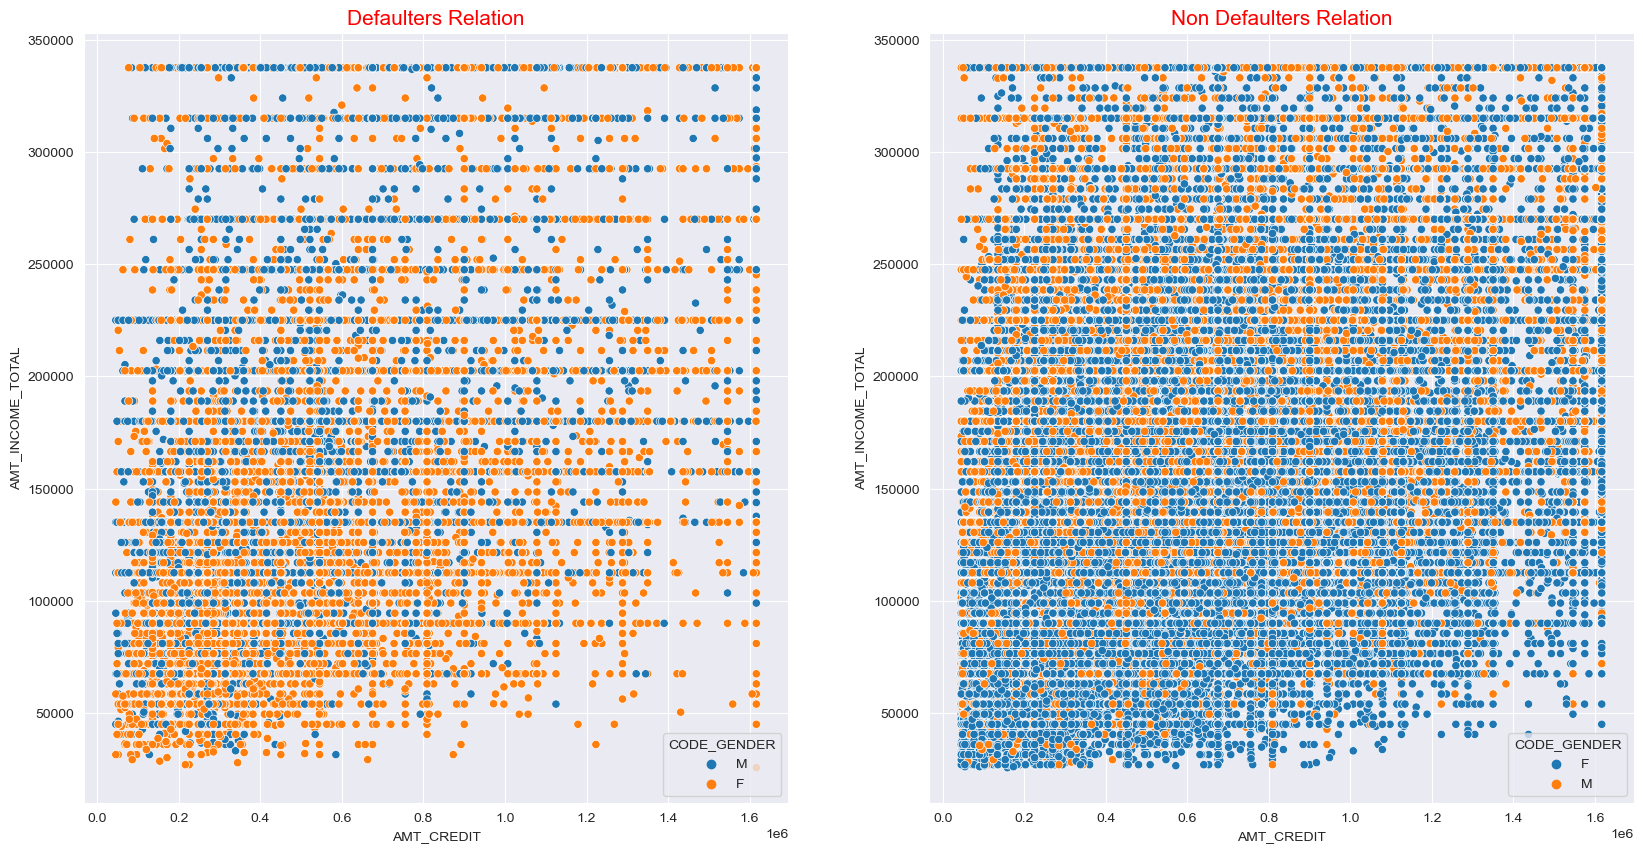

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.scatterplot(x = target_value_1.AMT_CREDIT,y = target_value_1.AMT_INCOME_TOTAL, hue = target_value_1.CODE_GENDER, data = target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(x = target_value_0.AMT_CREDIT,y = target_value_0.AMT_INCOME_TOTAL, hue = target_value_0.CODE_GENDER, data = target_value_0)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.show()

**Summary:**
- **For Non-Defaulters:** The values are evenly distributed among AMT_CREDIT and AMT_INCOME_TOTAL. There no distinguish between Male and female. It looks like all are having same ratio in this plot. So, Its hard to figure it out here.
- **For Defaulters:** There are more congested values in initial or lower areas of both AMT_CREDIT and AMT_INCOME_TOTAL. With the Income the LOAN value also increases.

#### 2. Numericals to Numericals Analysis

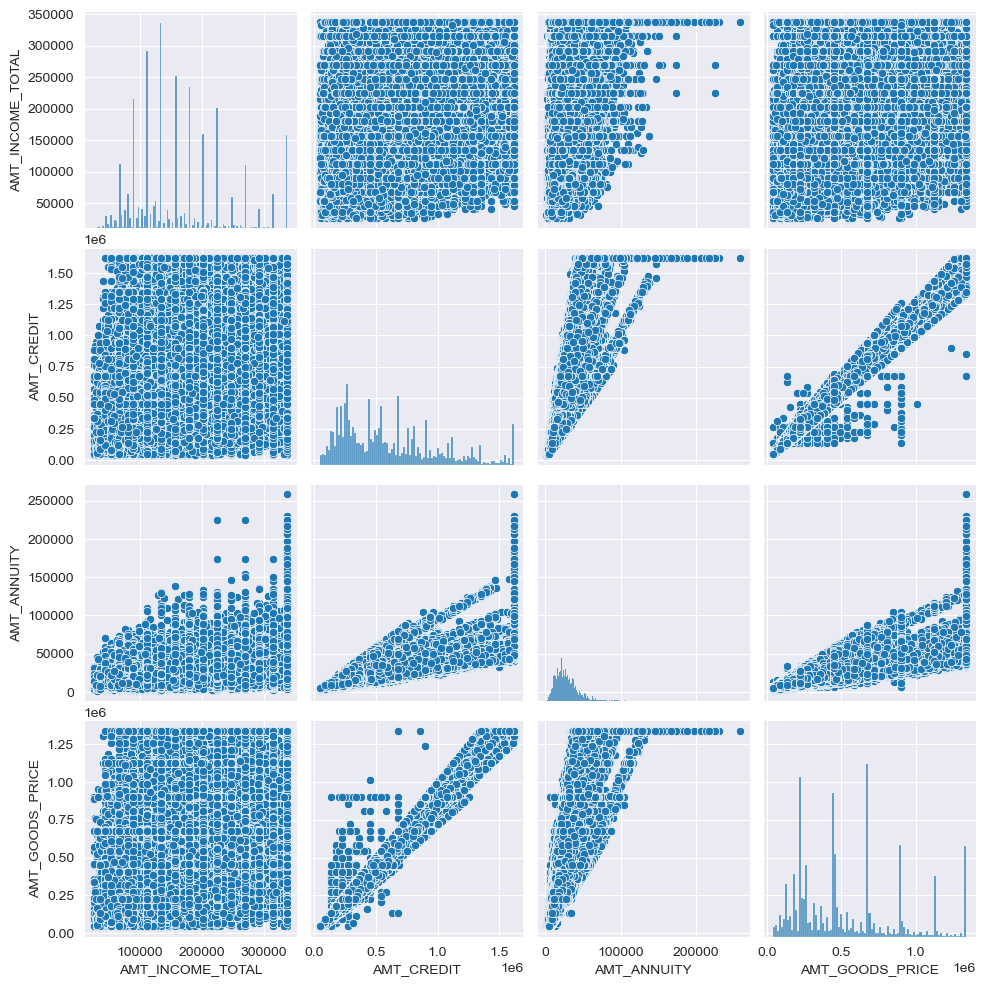

In [ ]:
sns.pairplot(target_value_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

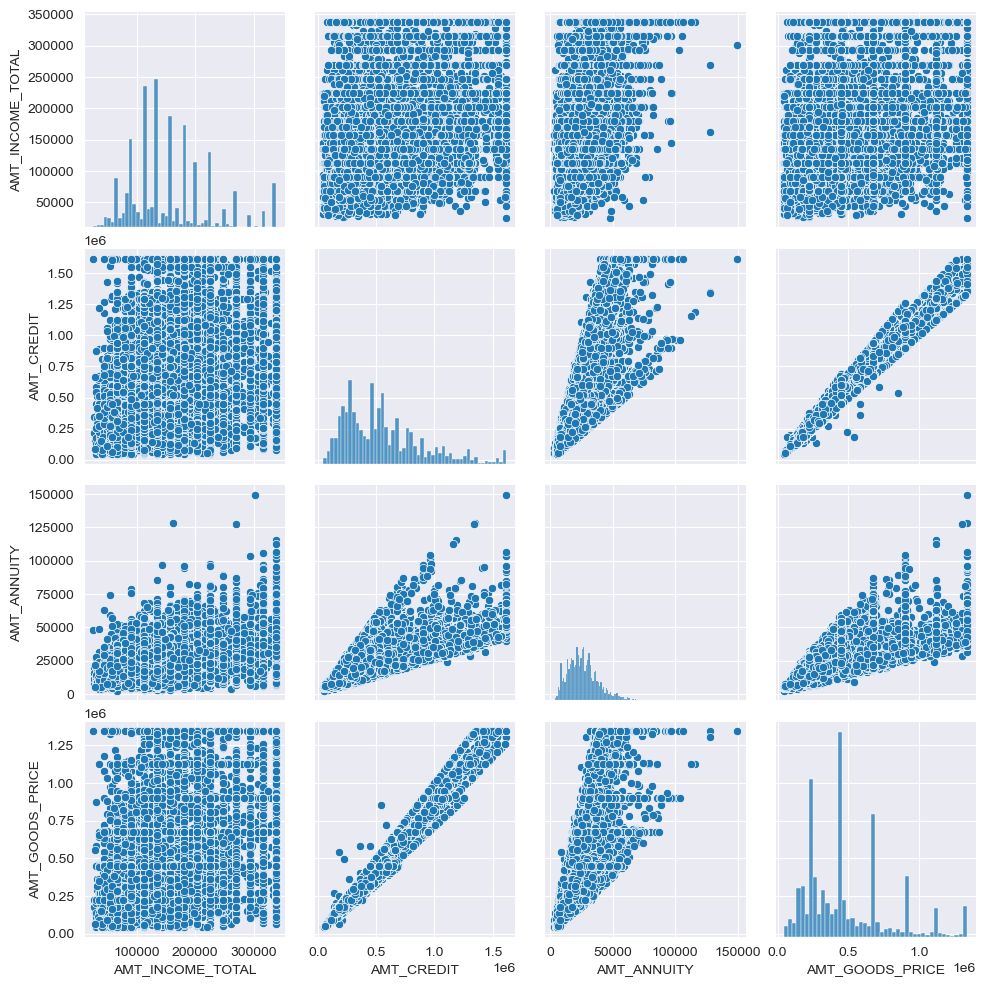

In [ ]:
sns.pairplot(target_value_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

#### 3. EDUCATION_TYPE & CODE_GENDER & AMT_INCOME_TOTAL

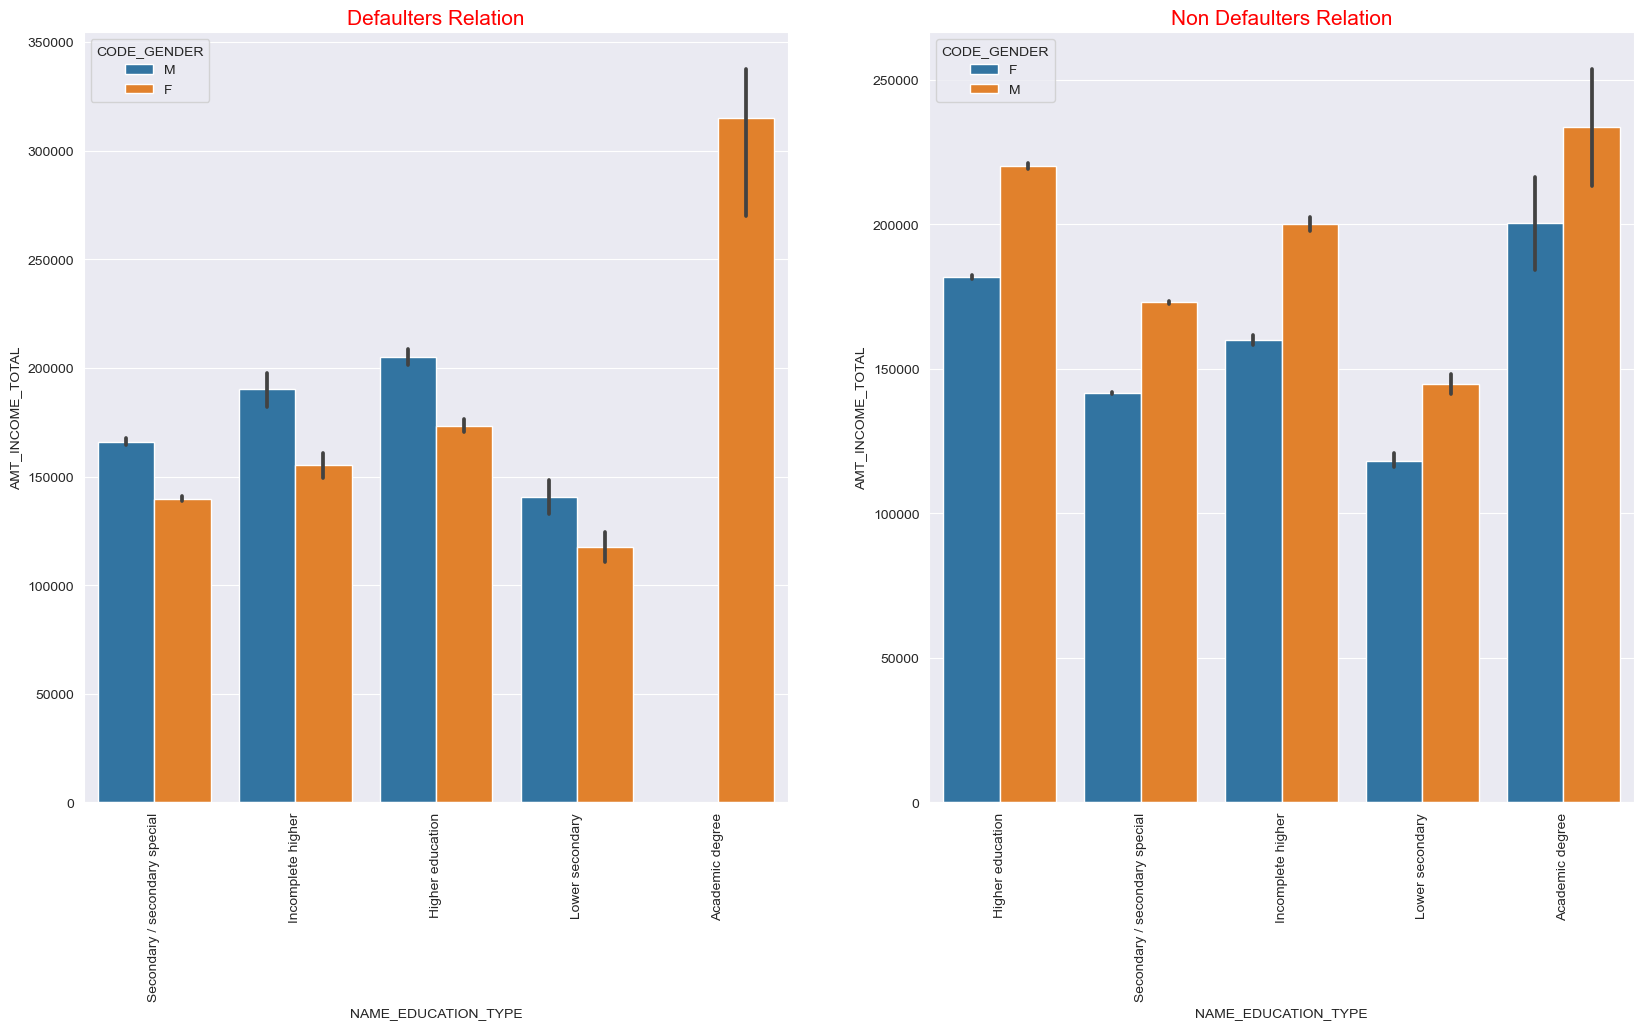

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.barplot(x = target_value_1.NAME_EDUCATION_TYPE,y = target_value_1.AMT_INCOME_TOTAL, hue = target_value_1.CODE_GENDER, data = target_value_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x = target_value_0.NAME_EDUCATION_TYPE,y = target_value_0.AMT_INCOME_TOTAL, hue = target_value_0.CODE_GENDER, data = target_value_0)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()


**Summary:**

- **Defaulters:** Female Academic Degree holders are earning more but still they are in defaulter list more. Where as not a single Academic male holders are in defaulter list.
- But for rest of the education type we can see that males are earning more as well being the more defaulters.

- **Non Defaulters:** Here also Female Academic degree holders are more and they are in high number when it comes to non defaulters. Nearly same amount non defaulter are there for guys who studied Higher education. Applied to both male and female. Female in all educational aspects are more non-defaulters than male.

#### 4.NAME_CONTRACT_TYPE & CODE_GENDER

In [ ]:
app_df.pivot_table(values="TARGET", index="NAME_CONTRACT_TYPE", columns="CODE_GENDER",aggfunc="mean")

CODE_GENDER                F         M
NAME_CONTRACT_TYPE                    
Cash loans          0.071811  0.105772
Revolving loans     0.052664  0.058503

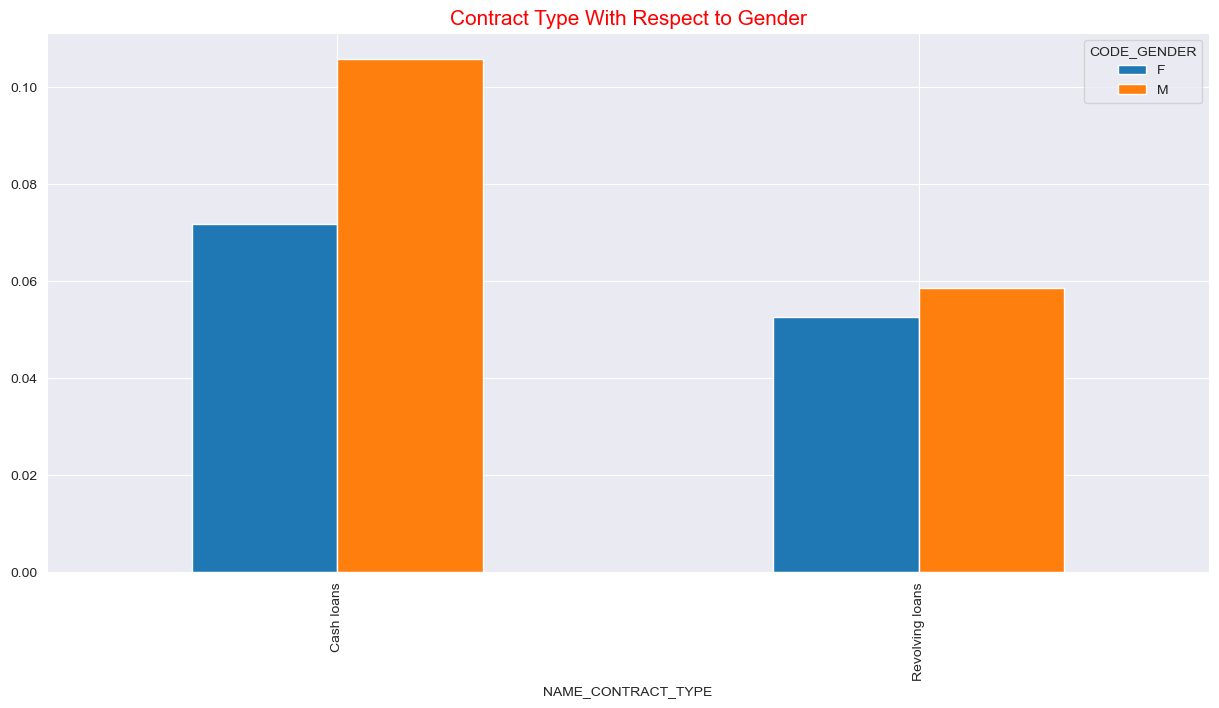

In [ ]:
app_df.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER', aggfunc = 'mean').plot.bar(figsize = (15,7))
plt.title('Contract Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

**Summary:**
- Cash loans by males are more compared to female and they are defaulters as well.
- Revolving loans are also taken by male more and they are most defaulters.

#### 5.NAME_INCOME_TYPE & GENDER & TARGET

In [ ]:
app_df.pivot_table(values="TARGET",index="NAME_INCOME_TYPE",columns="CODE_GENDER",aggfunc="mean")

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Businessman           0.000000  0.000000
Commercial associate  0.066670  0.088287
Maternity leave       0.500000  0.000000
Pensioner             0.049534  0.073190
State servant         0.053353  0.068812
Student               0.000000  0.000000
Unemployed            0.352941  0.400000
Working               0.083713  0.114945

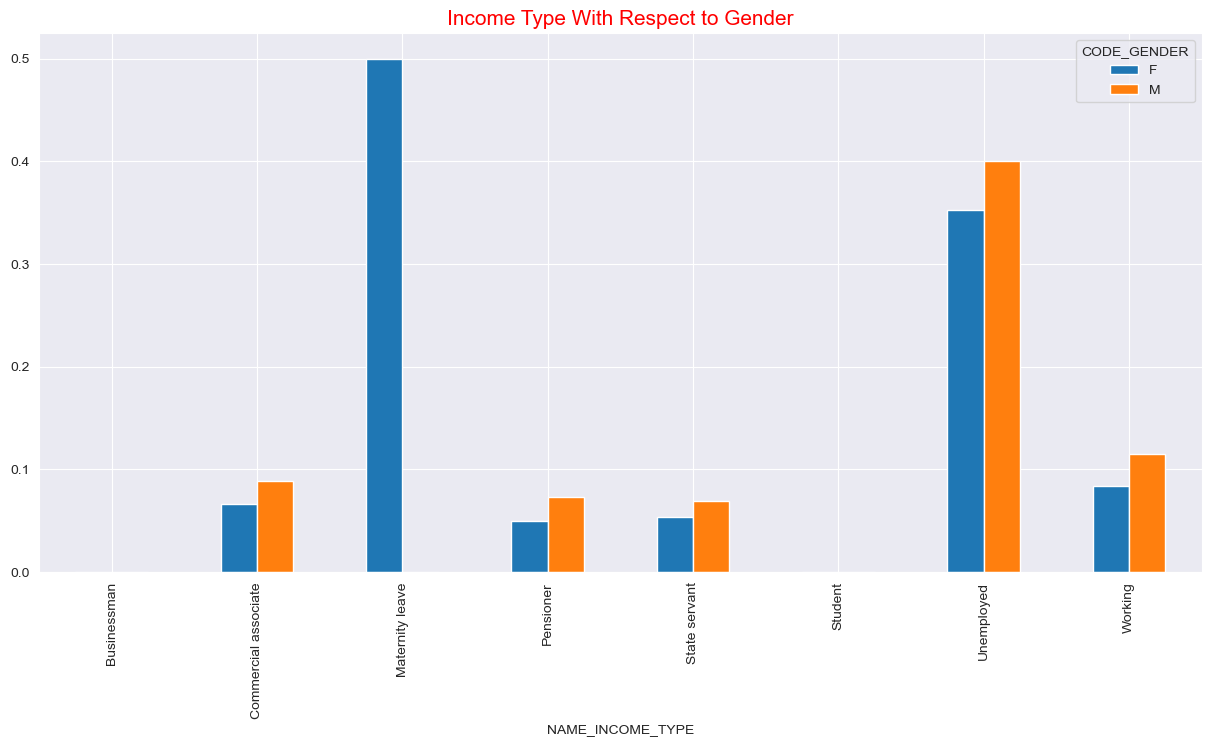

In [ ]:
app_df.pivot_table(values="TARGET",index="NAME_INCOME_TYPE",columns="CODE_GENDER",aggfunc="mean").plot.bar(figsize=(15,7))
plt.title("Income Type With Respect to Gender",color="red",fontsize=15)
plt.show()

**Summary:**
- We can see that Unemployed people are more defaulters in both male and female case.
- Males are more unemployed than female.
- Maternity leave females are also in higher no in defaulters list.
- Male no's are more compare to female in defaulters list.